<a href="https://colab.research.google.com/github/wanyuL/ReinforcementRats2021/blob/master/RNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run rnn0 on fake data

In [3]:
%load_ext autoreload
%autoreload 2

# Colab:
# ! git clone https://github.com/wanyuL/ReinforcementRats2021.git 
# import sys 
# sys.path.append('./ReinforcementRats2021')

In [4]:
import nmastandard
from rnn0 import *
from gen_fake_data import *
from load_data import *
import pickle

In [5]:
device=nmastandard.set_device()  # select device



In [6]:
# prepare for training

# file = open("Cori_MOs.pkl",'rb')
file = open("Cori_Post.pkl",'rb')
spk = pickle.load(file)

NT=spk.shape[0]
ntrials=spk.shape[1]
NN=spk.shape[2]
ncomp=10

trainingData = torch.from_numpy(spk[:, :ntrials*4//5, :]).to(device).float()
testData = torch.from_numpy(spk[:, ntrials*4//5:, :]).to(device).float()


In [7]:
trainingData.shape

torch.Size([250, 200, 254])

In [8]:
import rnnautoencoder as rnnae


In [9]:
#NN1 = trainingData.shape[-1]
#NN2 = testData.shape[-1]

# we initialize the neural network
# net = rnn0(ncomp, trainingData.shape[-1], trainingData.shape[-1], dropout=0.5 ,bidi = False).to(device)
net = rnnae.RNNAE(trainingData.shape[-1], 50, [100, 75], [75, 100])

# special thing:  we initialize the biases of the last layer in the neural network
# we set them as the mean firing rates of the neurons.
# this should make the initial predictions close to the mean, because the latents don't contribute much
# net.fc.bias.data[:] = trainingData.mean((0,1))


Random seed 2021 has been set.
Naive 0 Guess Accuracy: 0.9657613039016724


MSE Train @ 0: Loss — 0.04071236401796341, Acc — 0.8653044104576111
	Val @ 0: Loss — 0.0420367605984211, Acc — 0.8636445999145508
MSE Train @ 10: Loss — 0.030306752771139145, Acc — 0.9050989747047424
	Val @ 10: Loss — 0.03211294487118721, Acc — 0.9061886668205261
MSE Train @ 20: Loss — 0.018215807154774666, Acc — 0.934326708316803
	Val @ 20: Loss — 0.019415942952036858, Acc — 0.9323371648788452
MSE Train @ 30: Loss — 0.01419014111161232, Acc — 0.9490431547164917
	Val @ 30: Loss — 0.015377793461084366, Acc — 0.9468615055084229
MSE Train @ 40: Loss — 0.012112085707485676, Acc — 0.9557803273200989
	Val @ 40: Loss — 0.013340375386178493, Acc — 0.9536337852478027
MSE Train @ 50: Loss — 0.010868438519537449, Acc — 0.9581575393676758
	Val @ 50: Loss — 0.012178503908216953, Acc — 0.9556201696395874



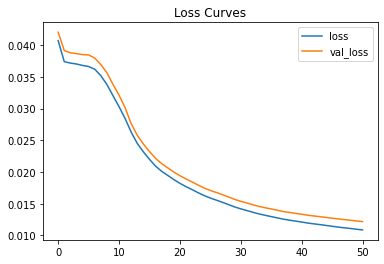

In [10]:
# train the rnn!

import nmastandard as nmas
SEED = 2021
nmas.set_seed(seed=SEED)
DEVICE = nmas.set_device()

print(f'Naive 0 Guess Accuracy: {1-(testData > 0).float().mean()}')

loss, val_loss = rnnae.train_autoencoder(net, trainingData, DEVICE, val_dataset=testData, epochs=51, batch_size=20, seed=0)
# might not expect the model to generalize well, as the adjacency matrices might 
# differ between different neuron subpopulations

plt.figure()
plt.title('Loss Curves')
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

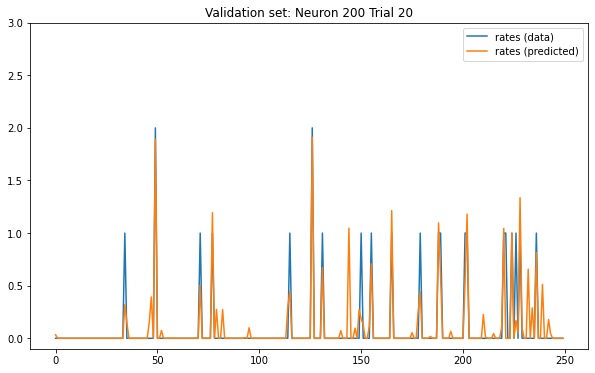

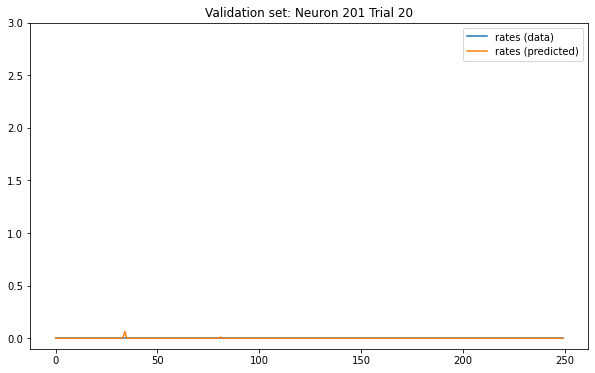

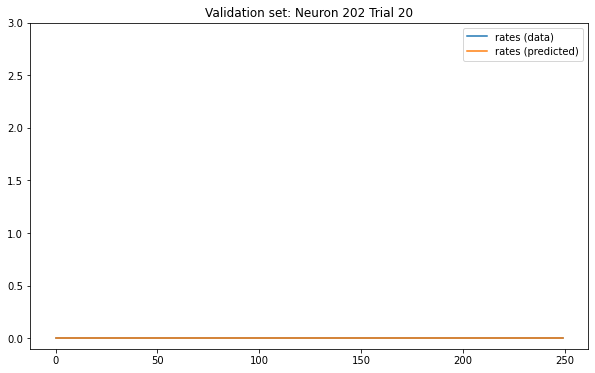

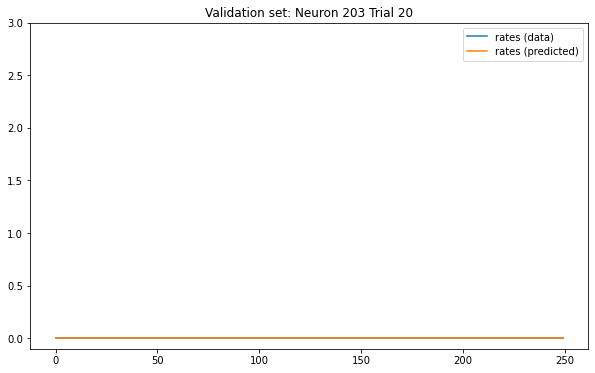

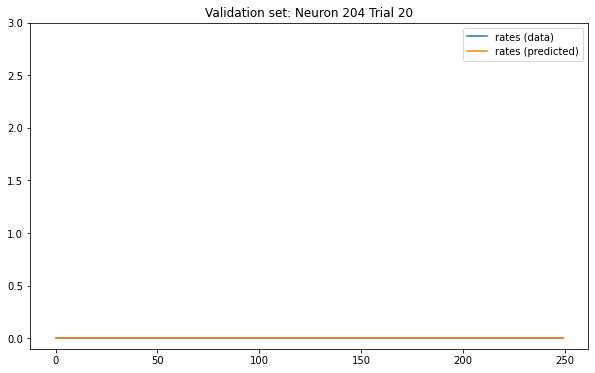

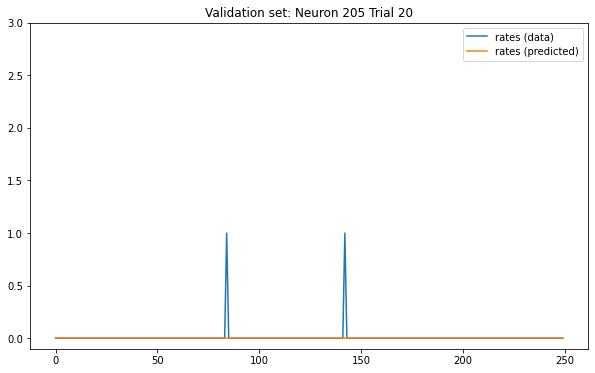

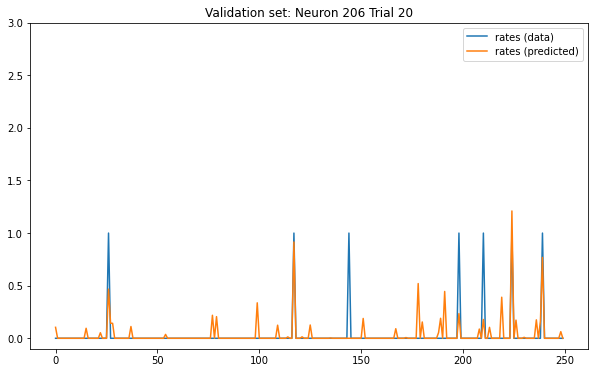

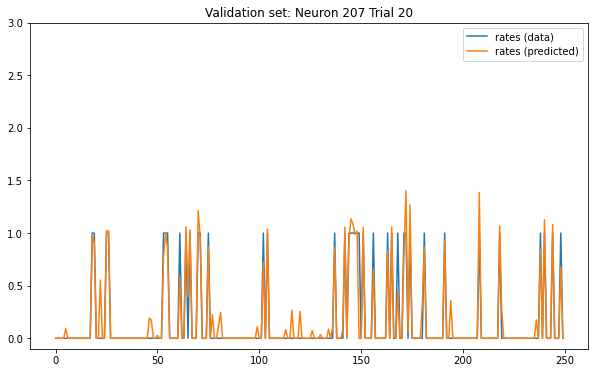

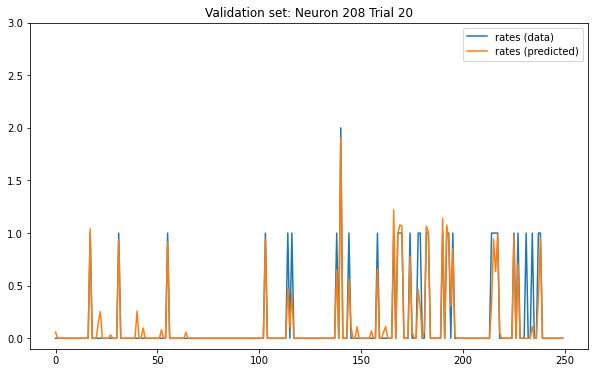

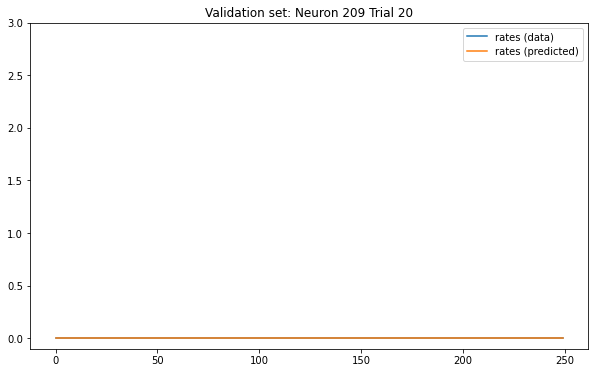

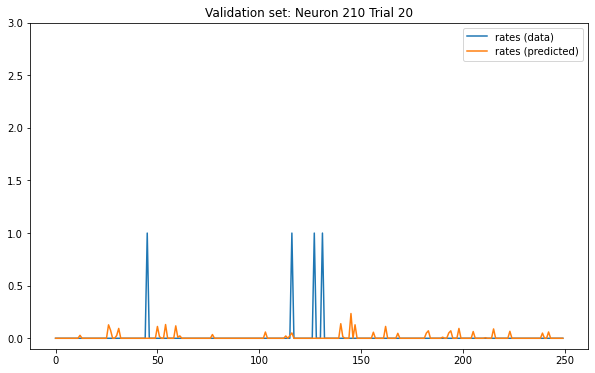

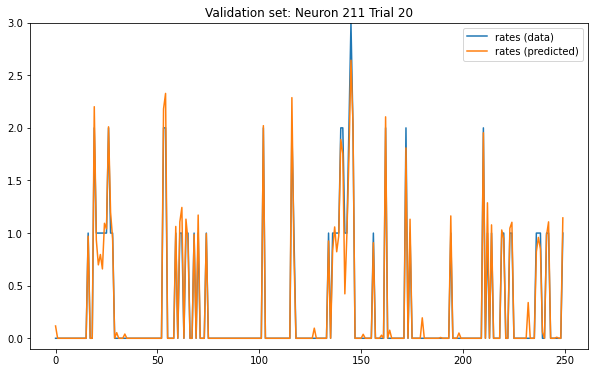

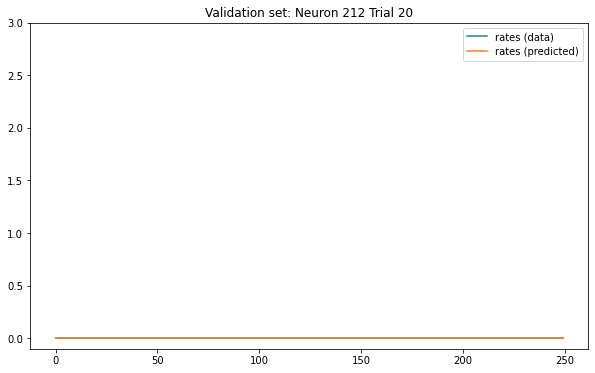

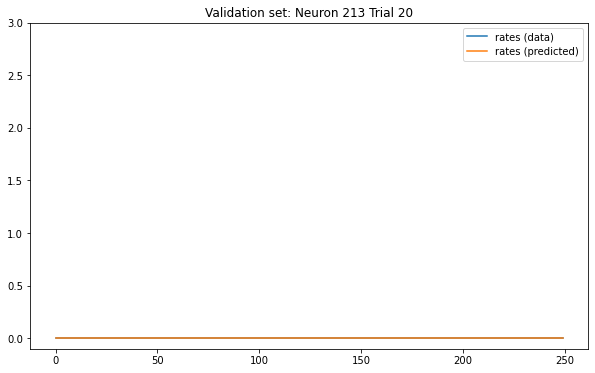

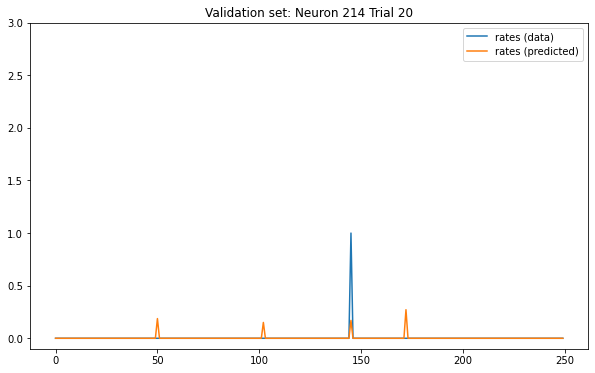

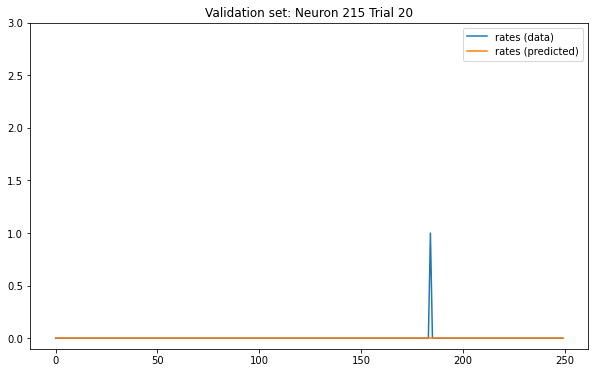

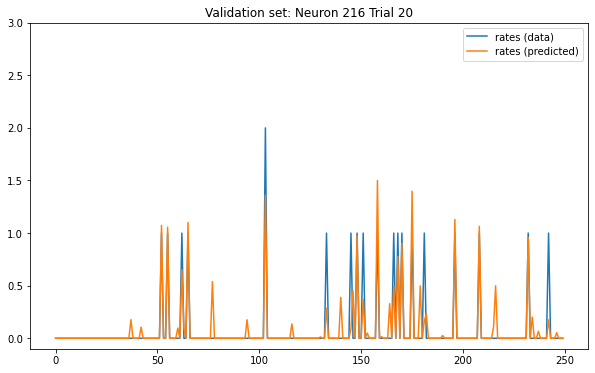

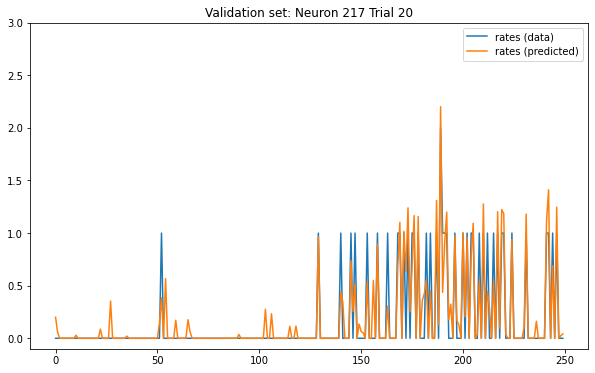

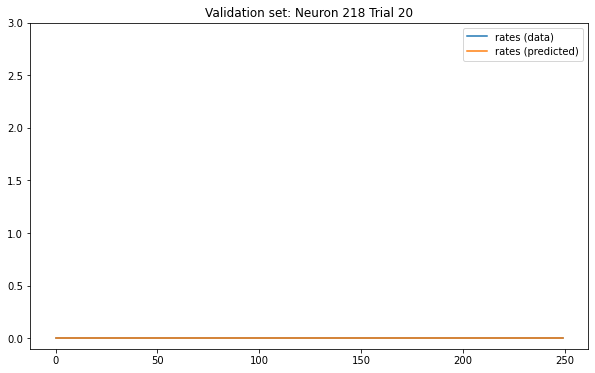

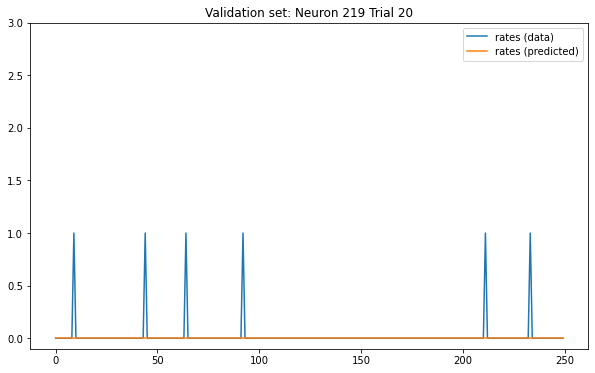

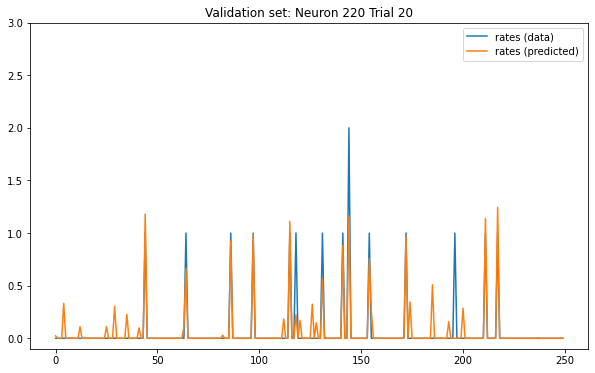

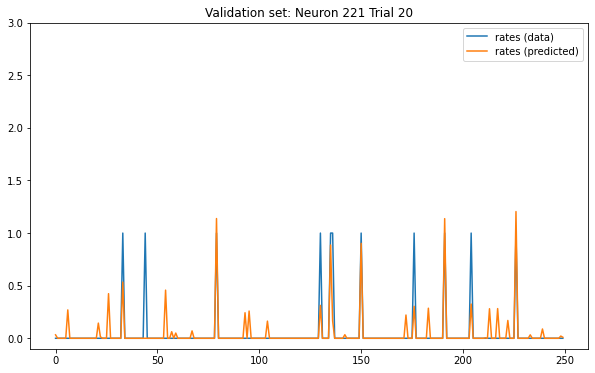

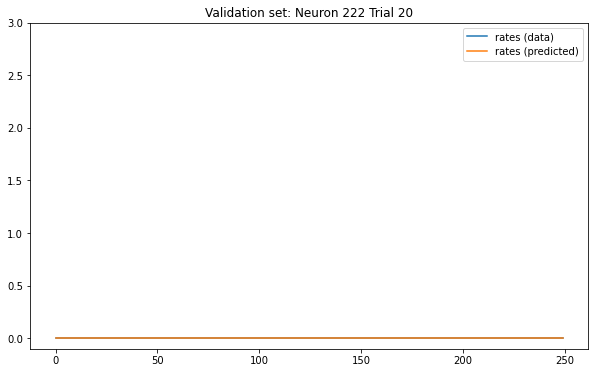

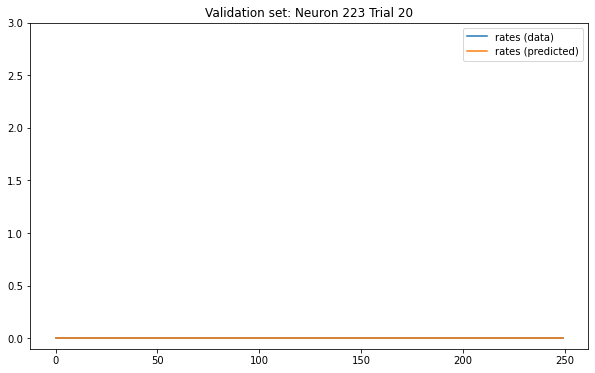

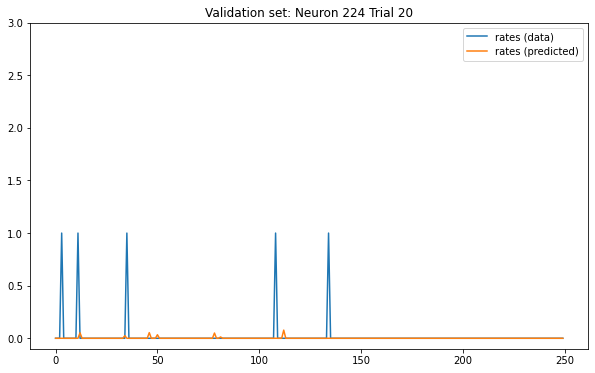

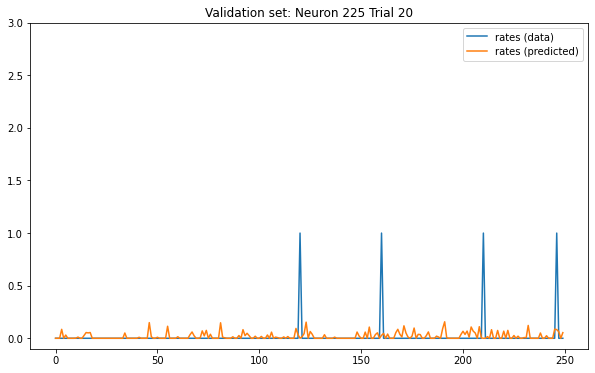

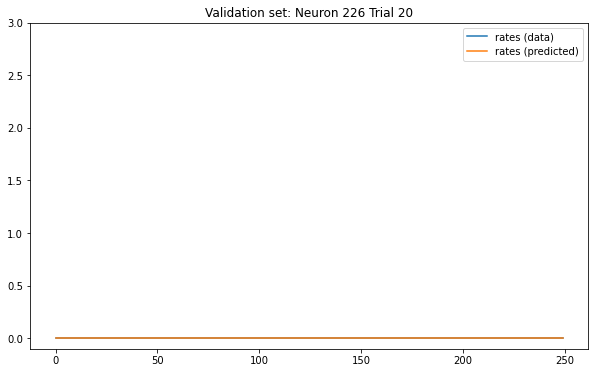

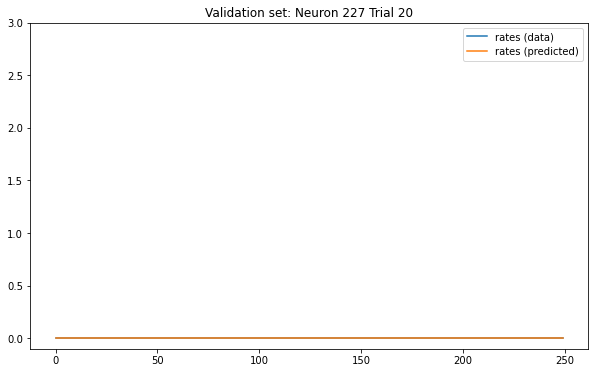

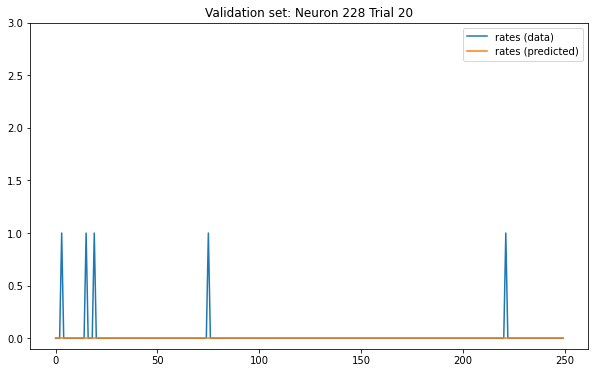

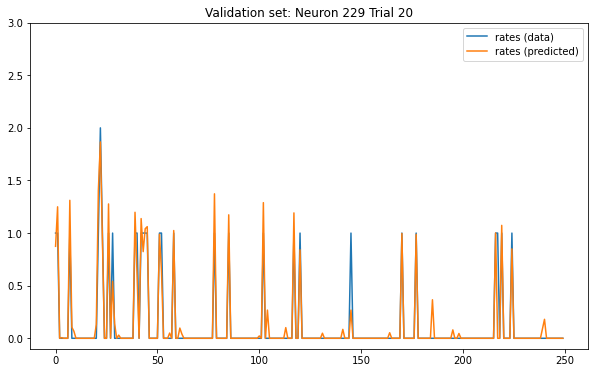

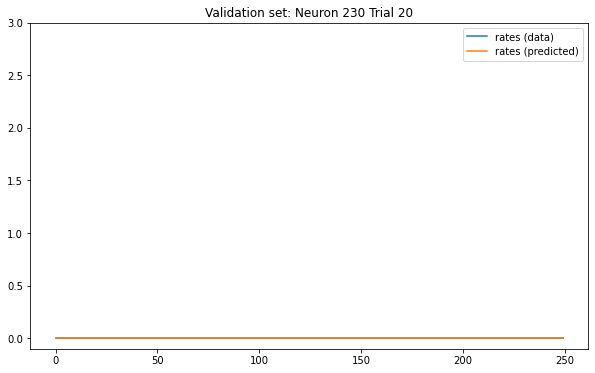

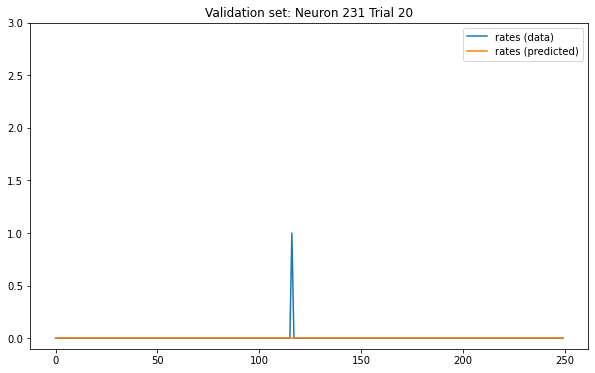

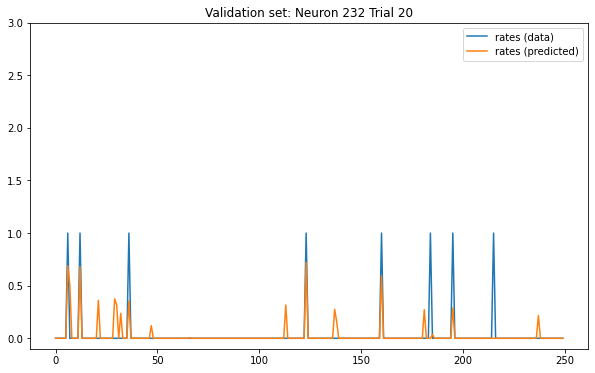

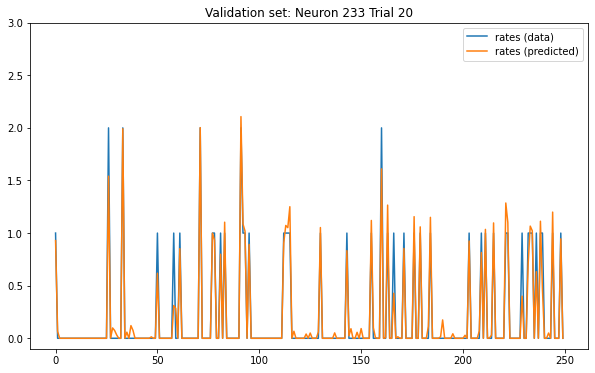

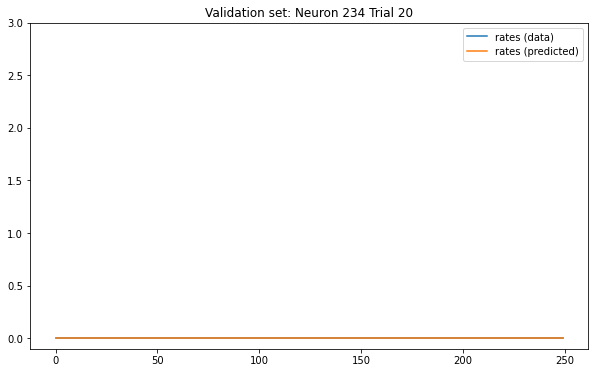

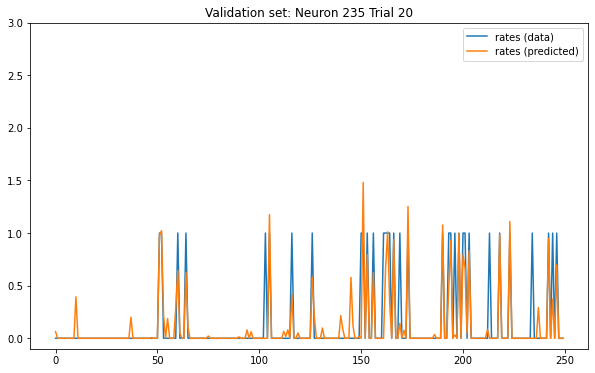

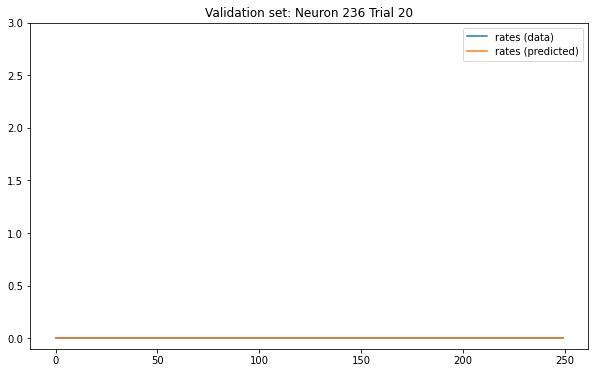

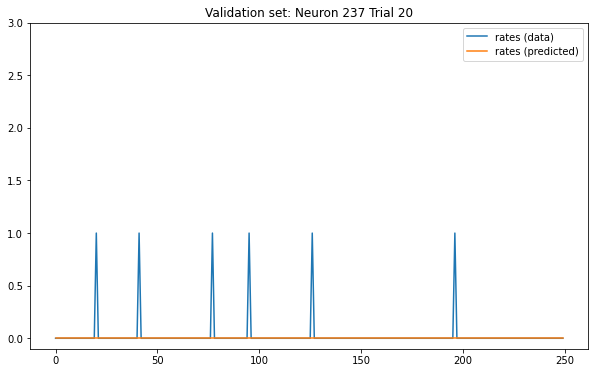

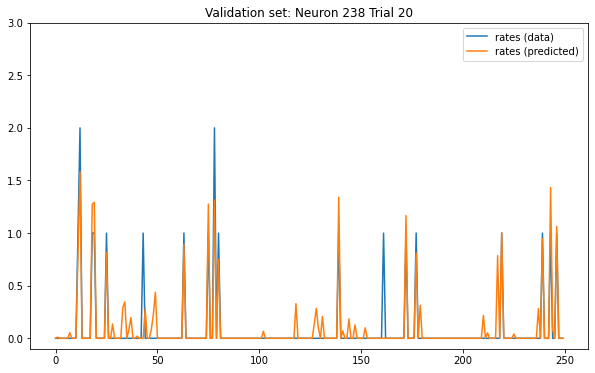

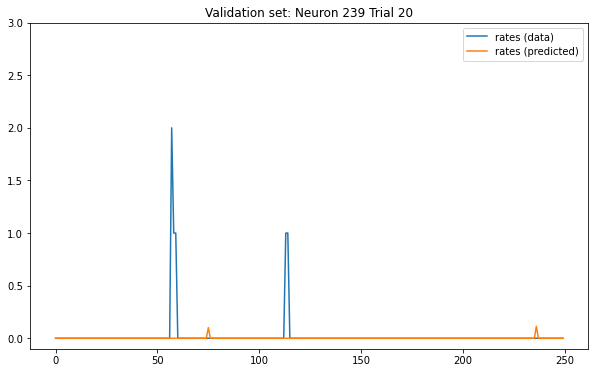

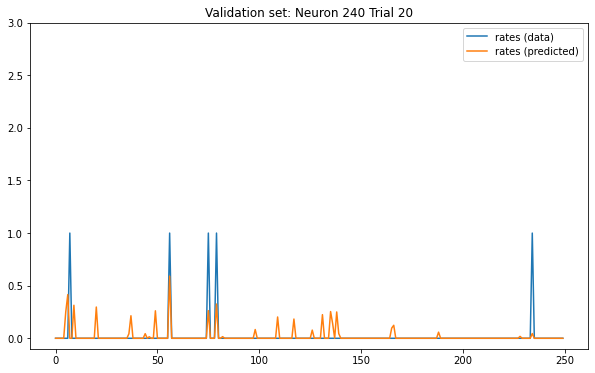

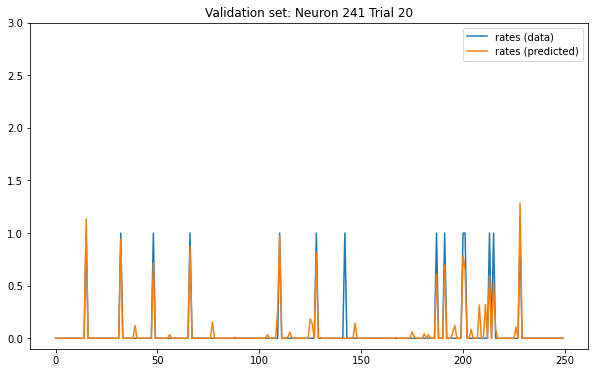

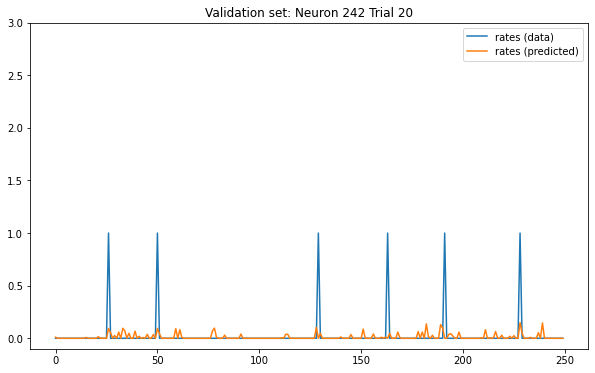

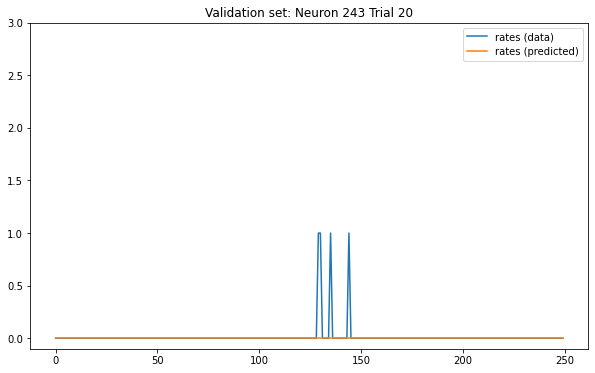

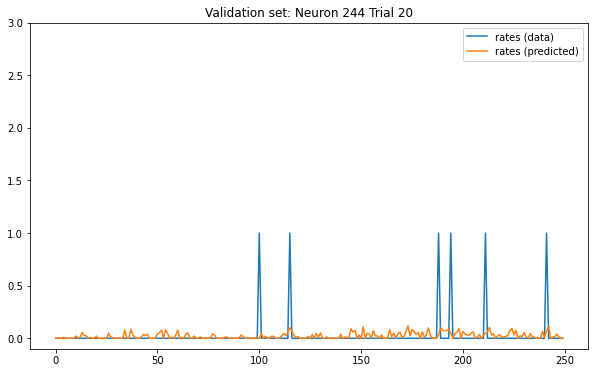

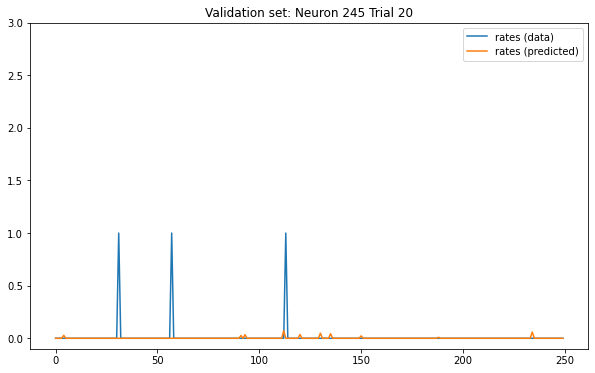

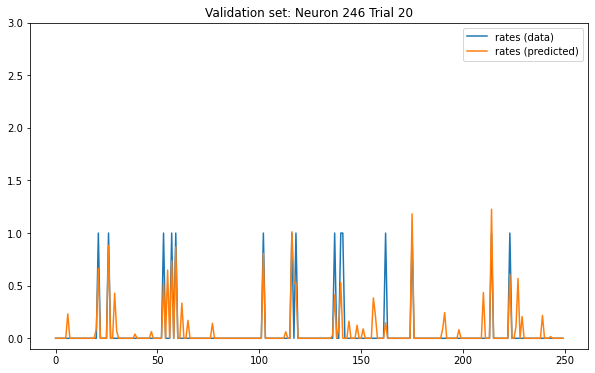

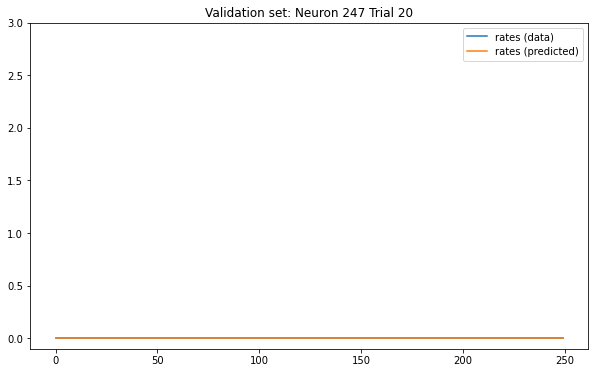

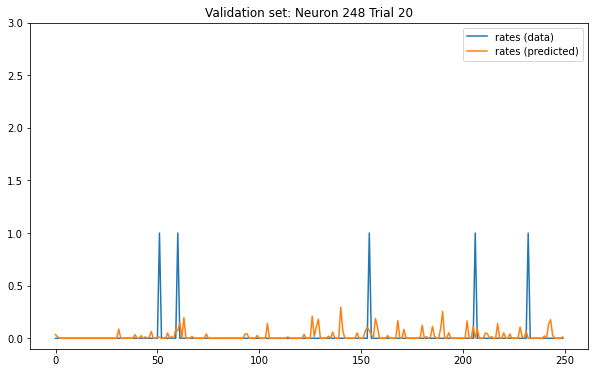

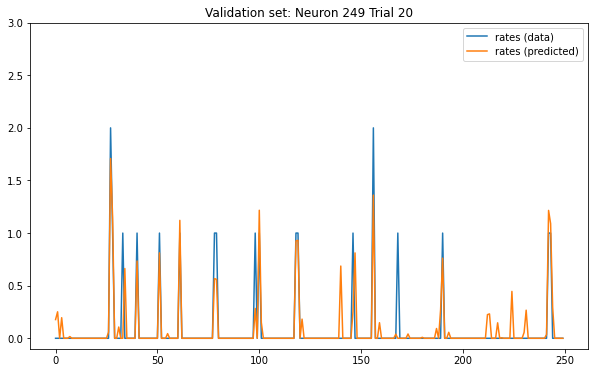

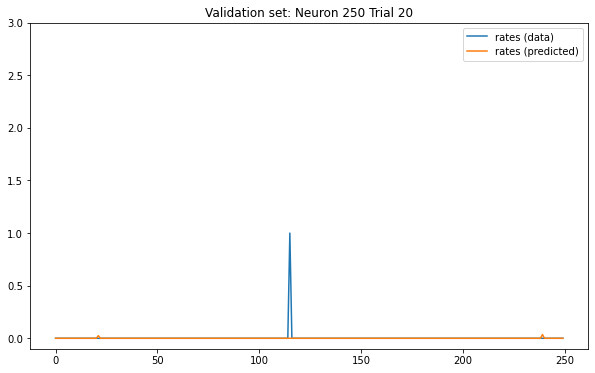

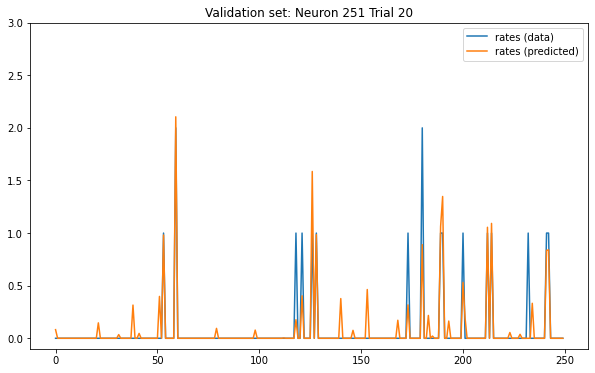

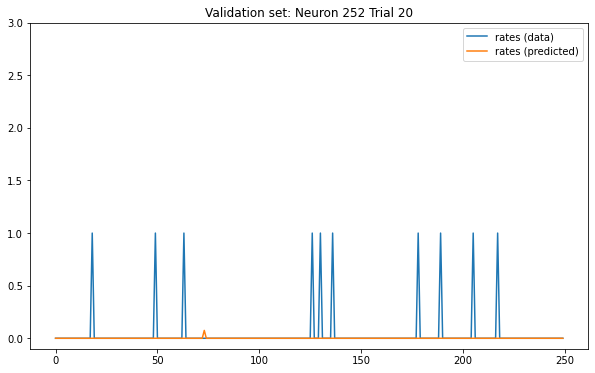

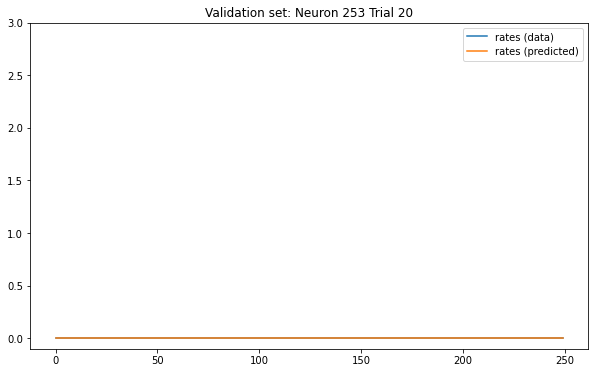

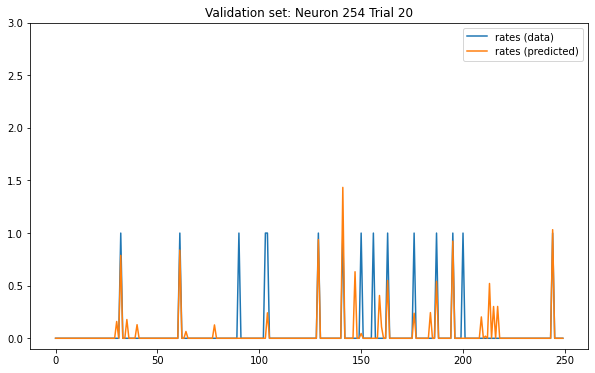

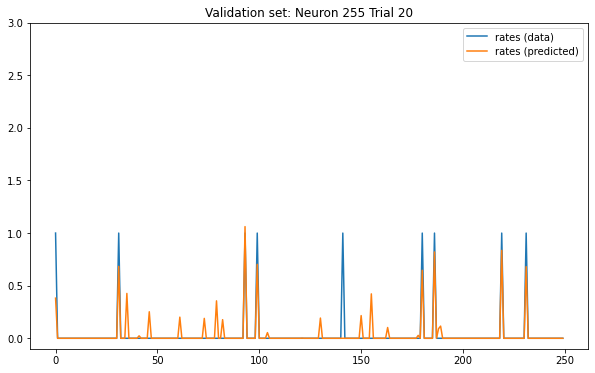

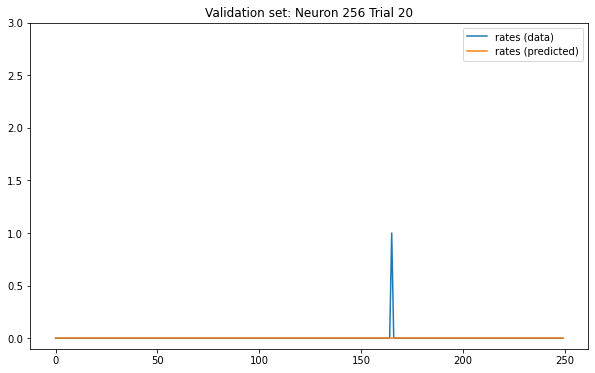

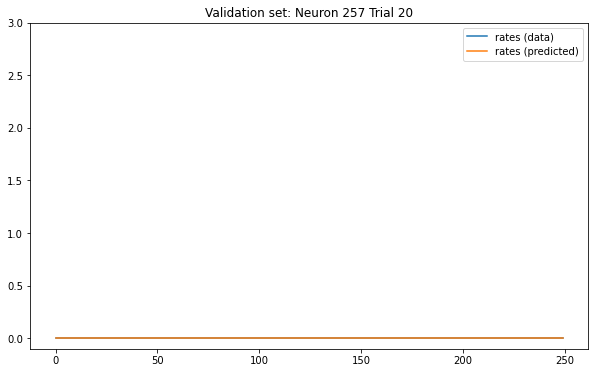

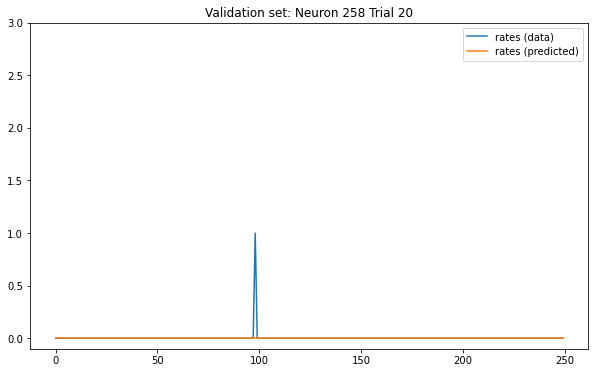

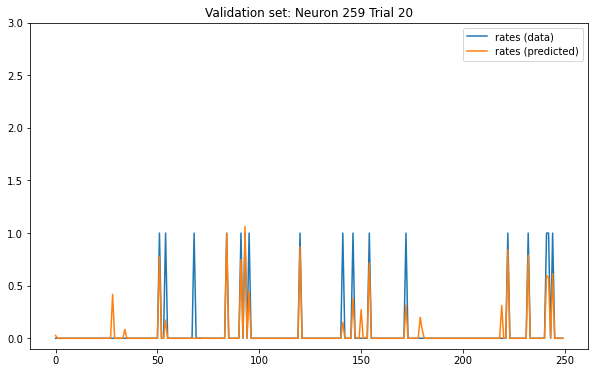

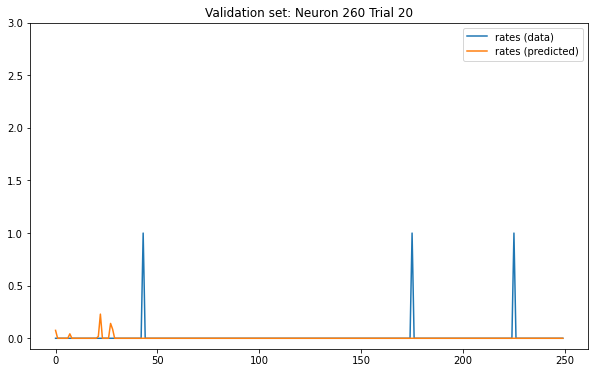

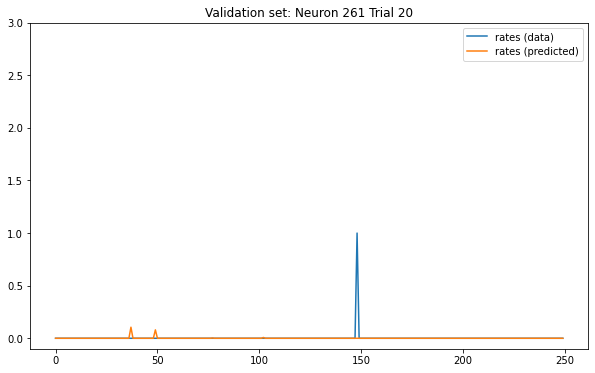

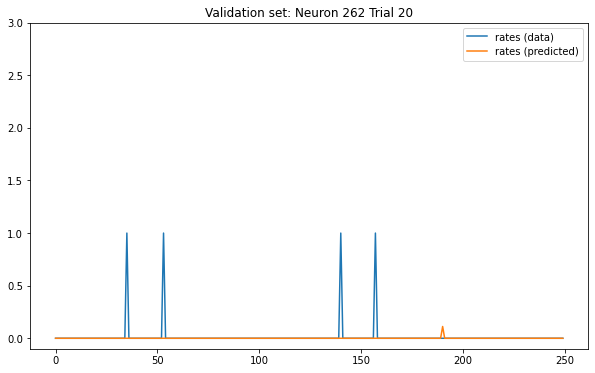

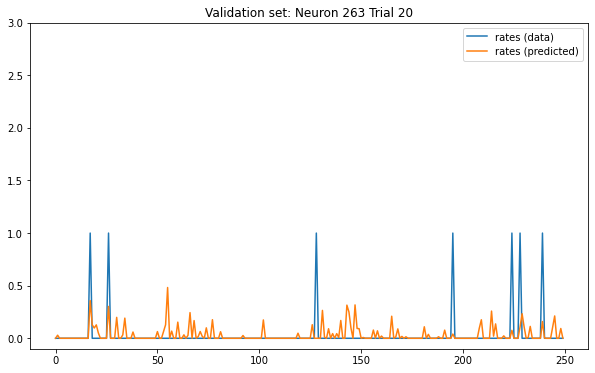

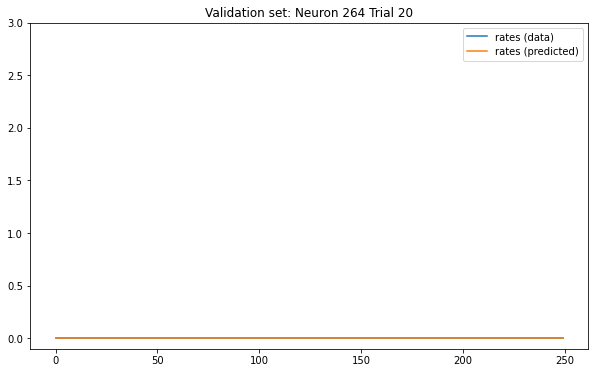

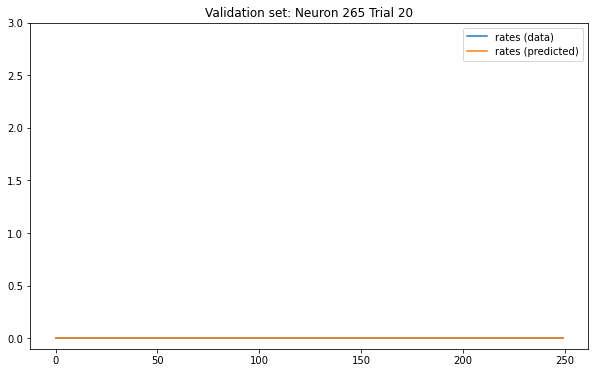

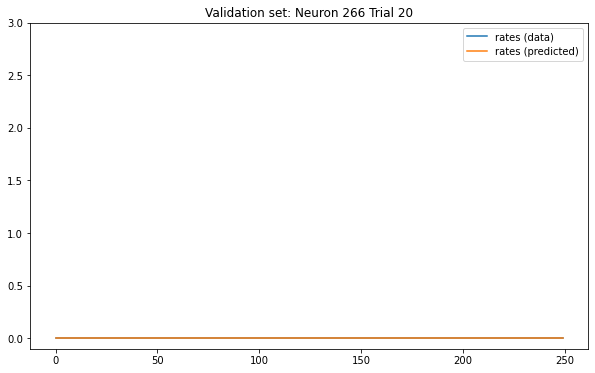

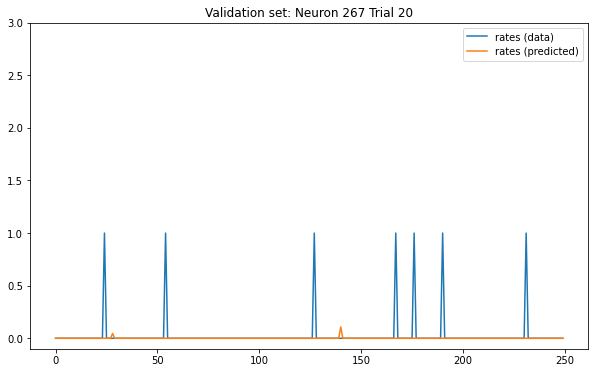

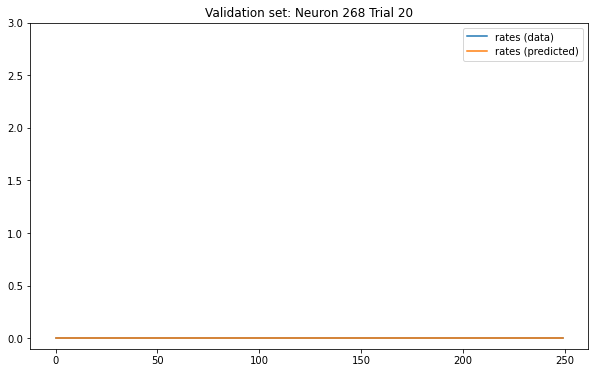

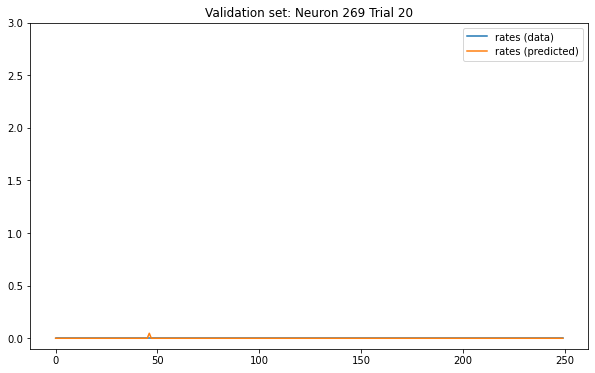

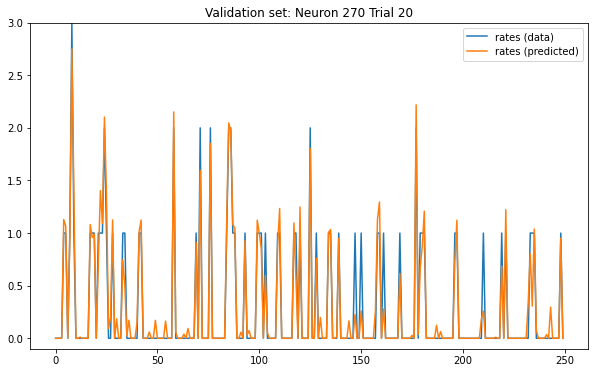

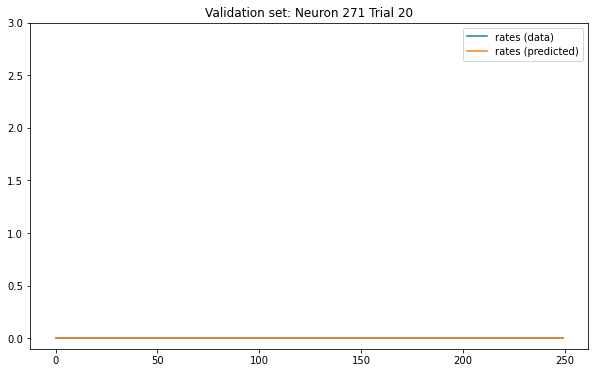

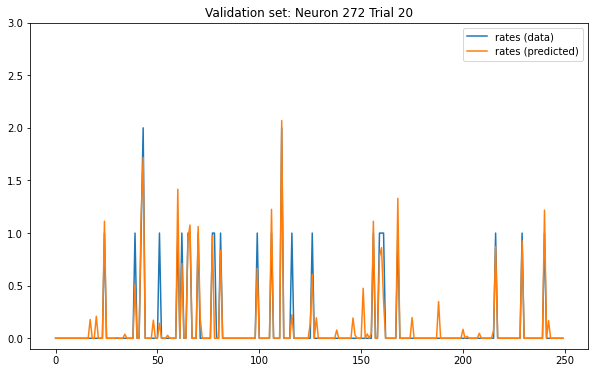

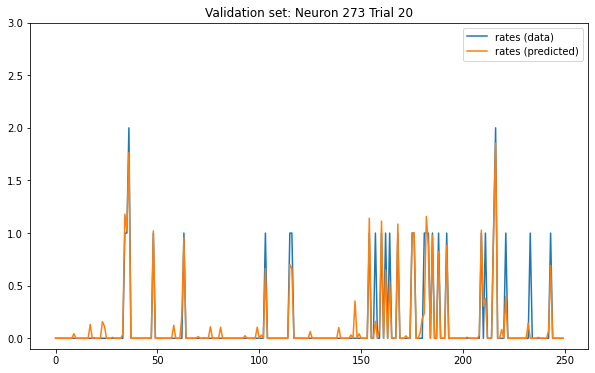

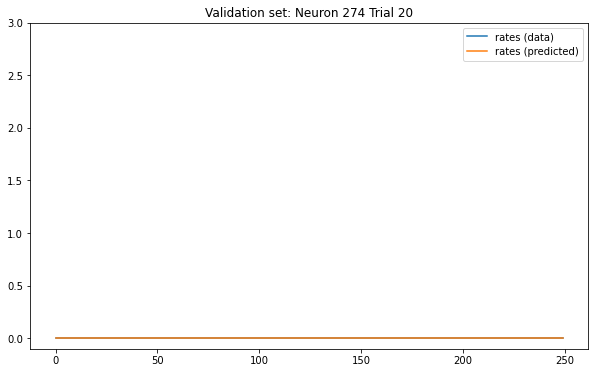

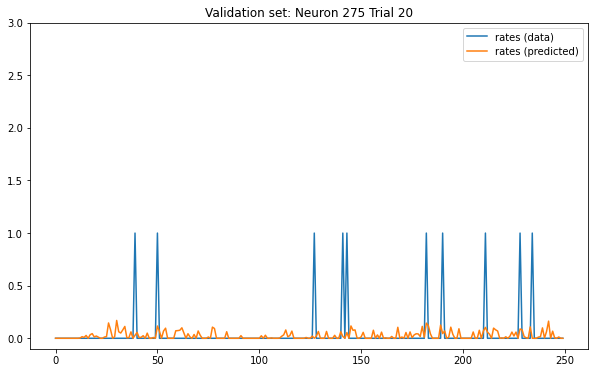

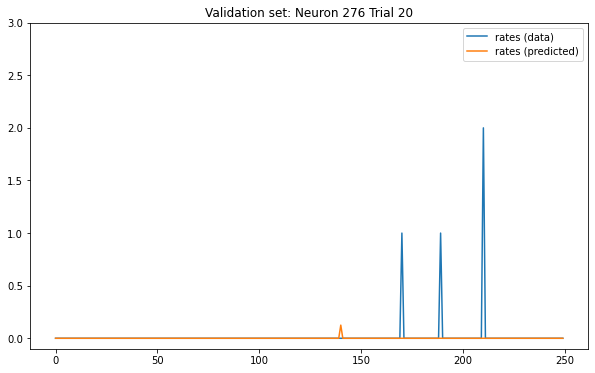

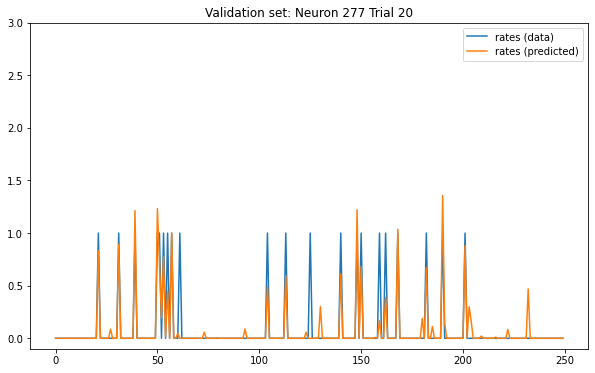

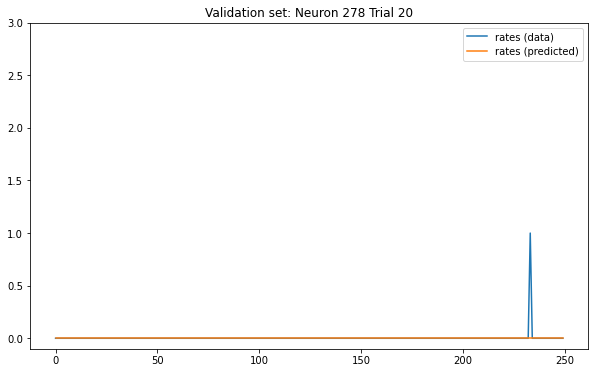

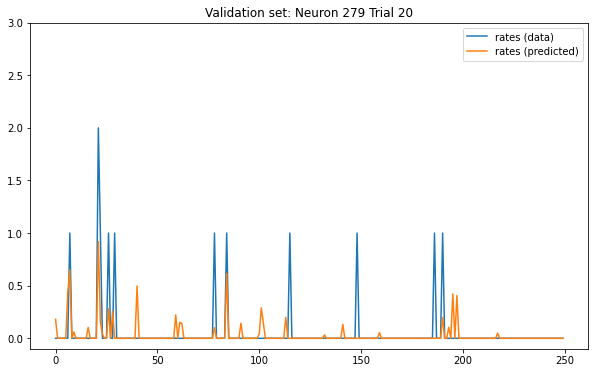

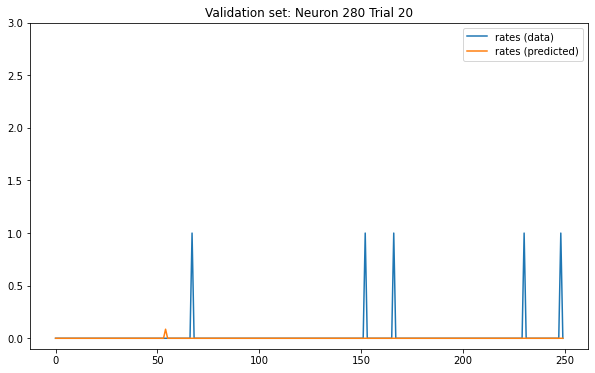

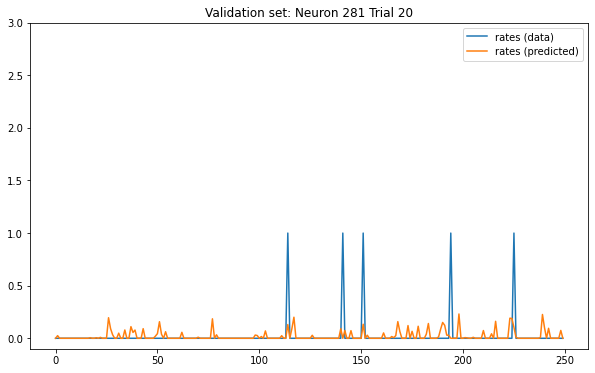

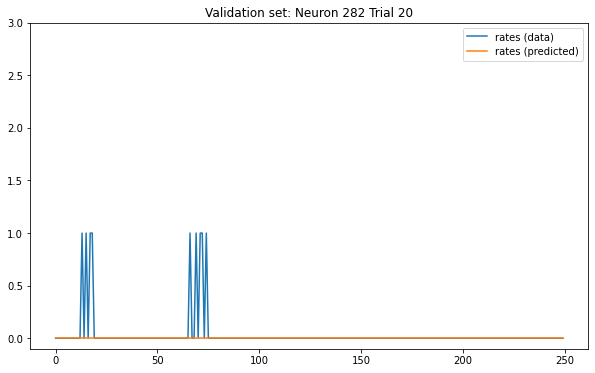

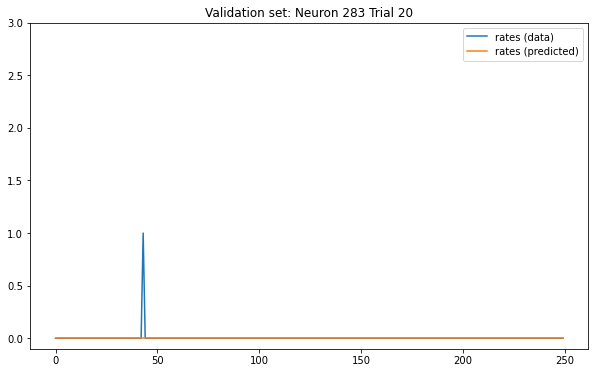

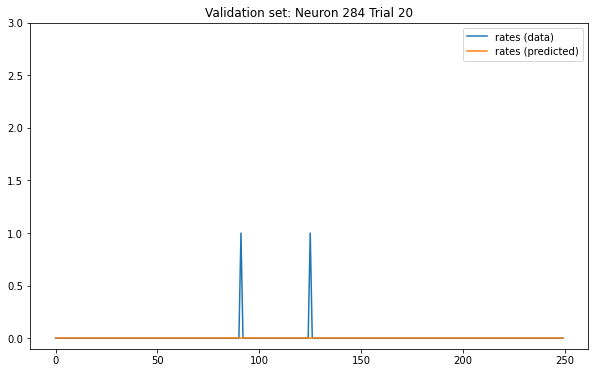

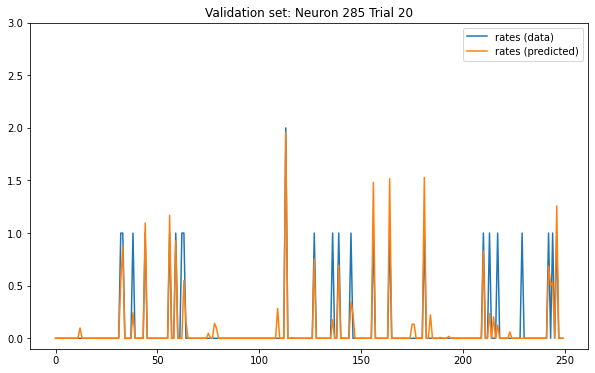

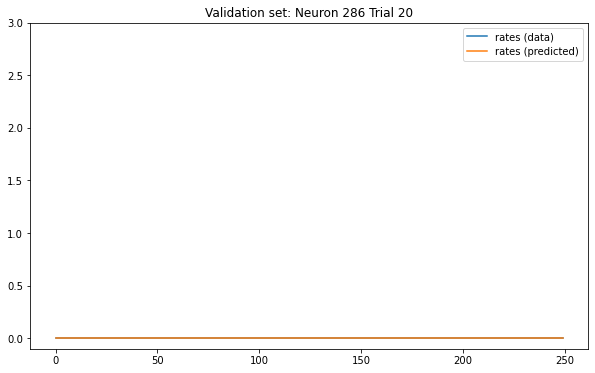

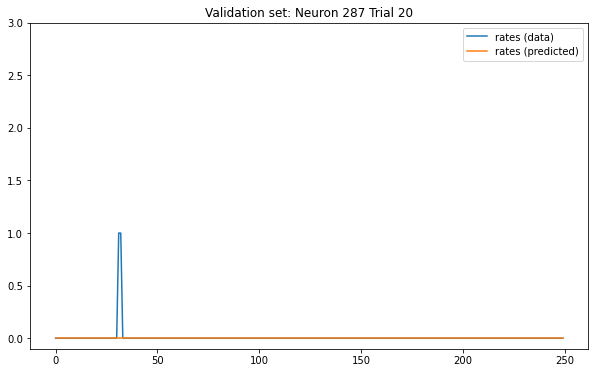

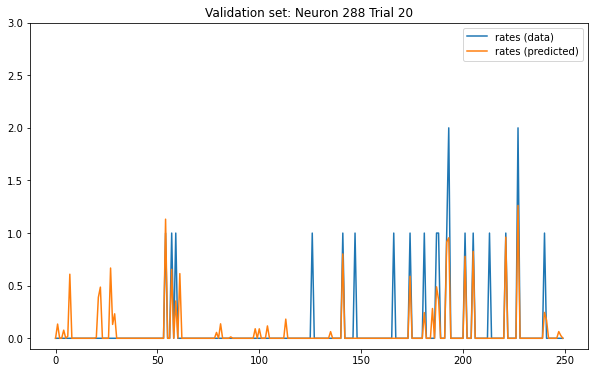

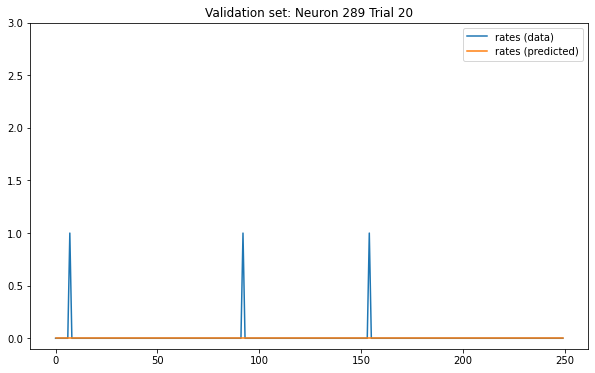

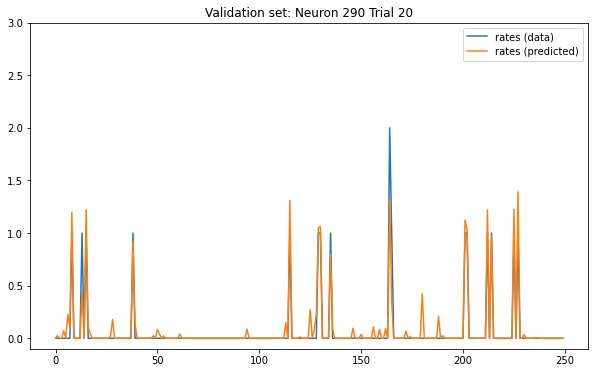

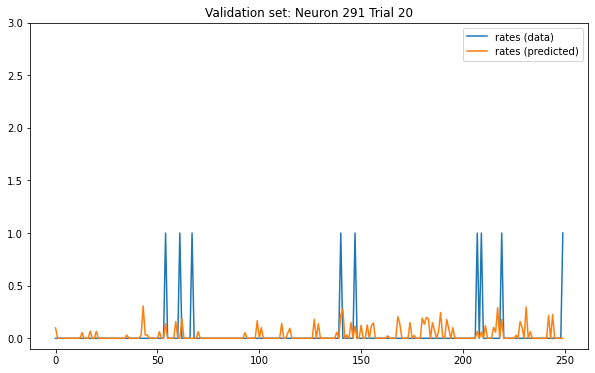

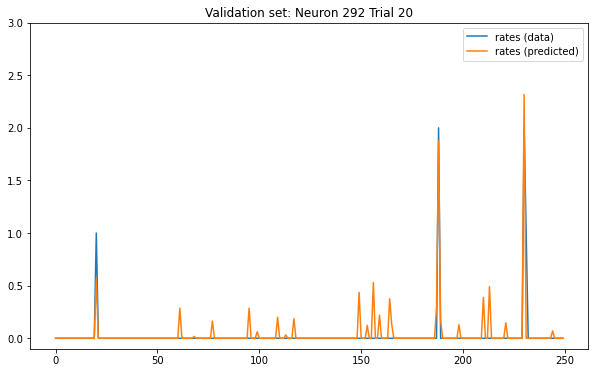

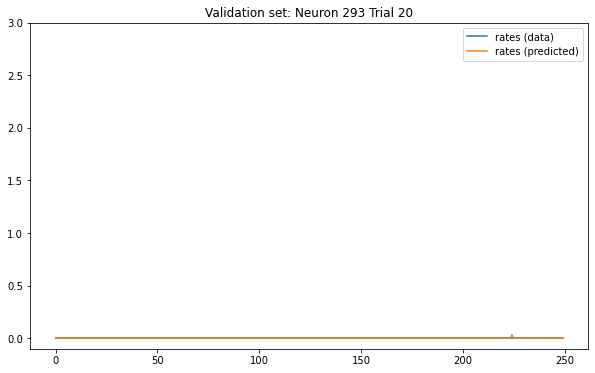

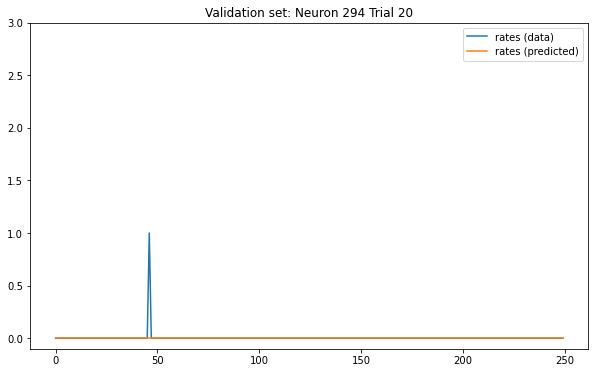

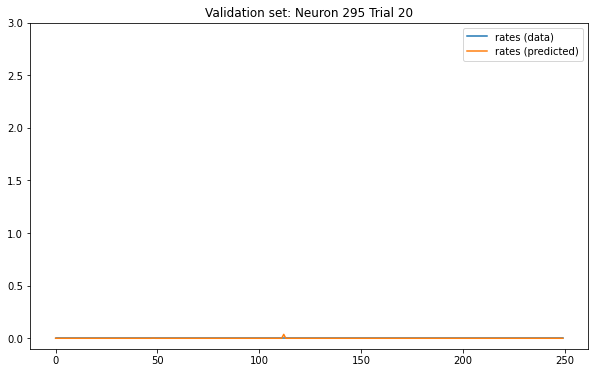

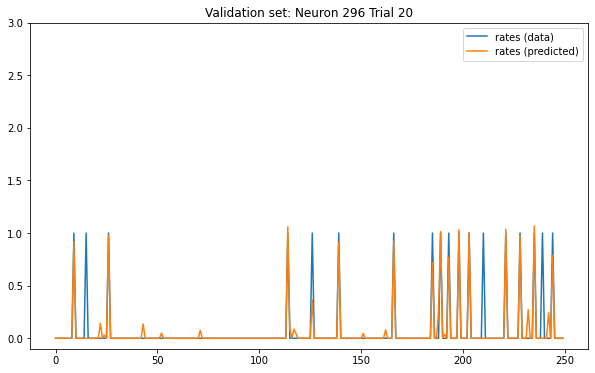

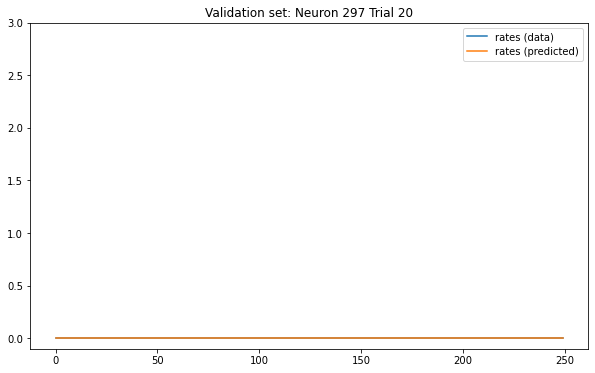

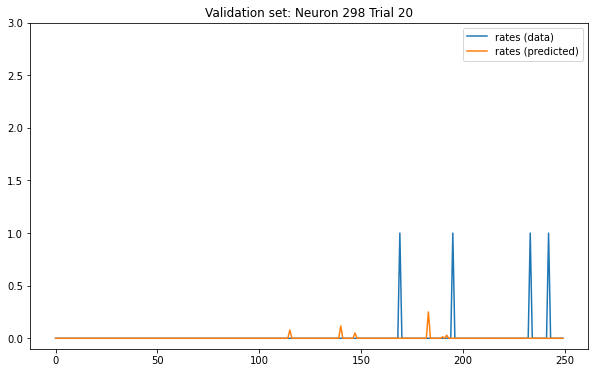

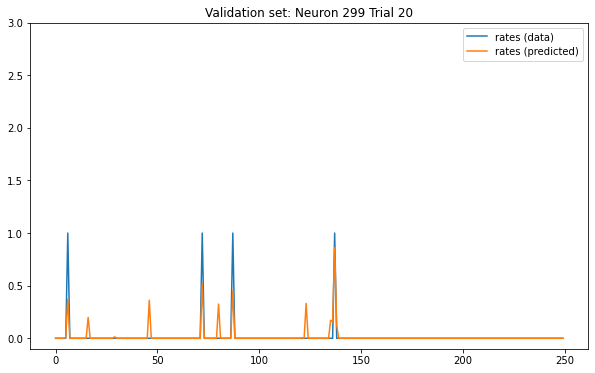

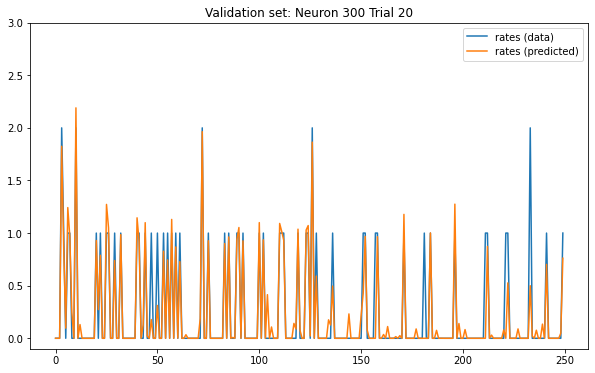

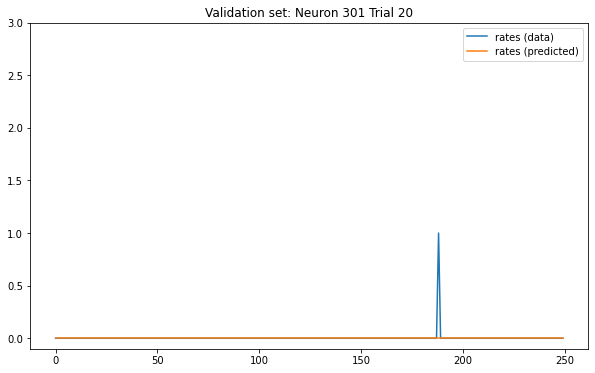

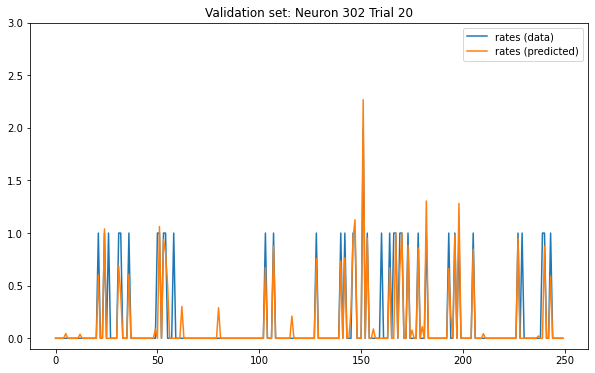

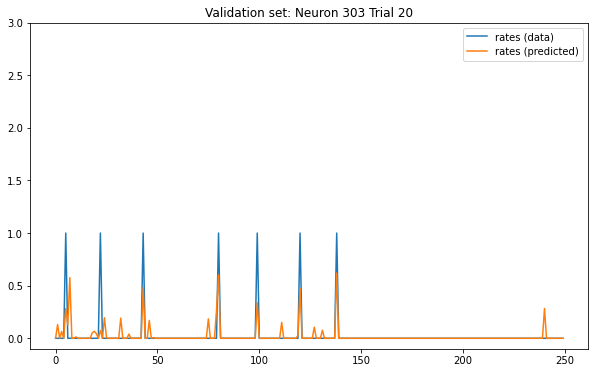

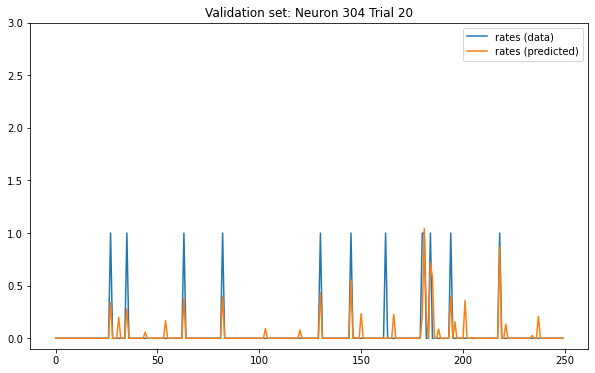

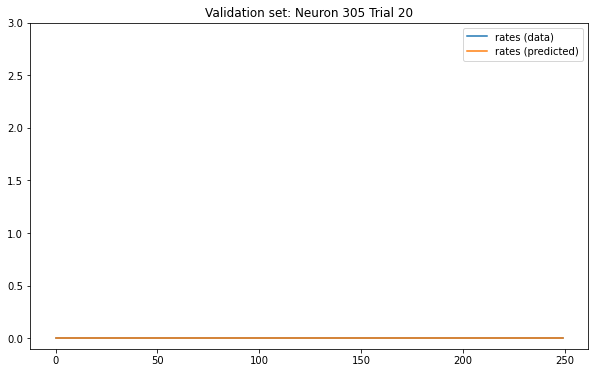

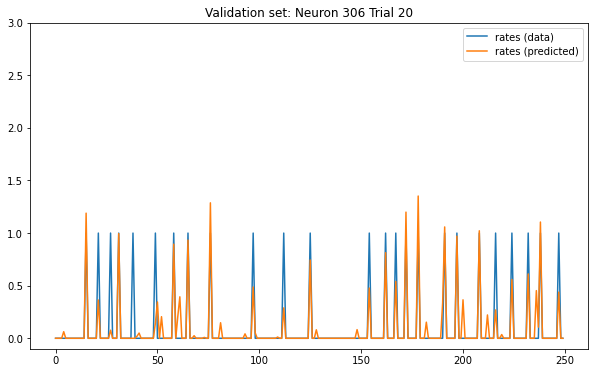

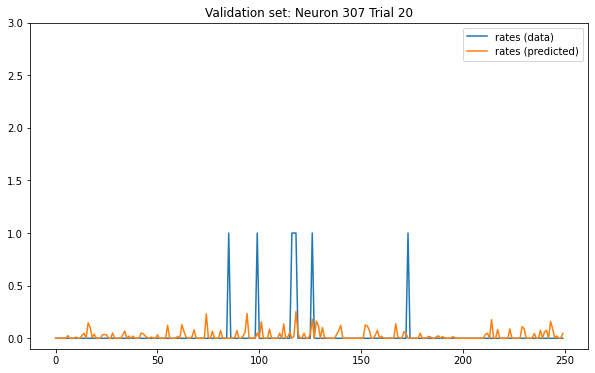

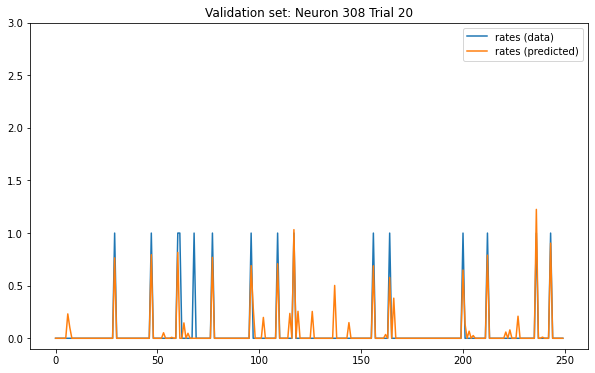

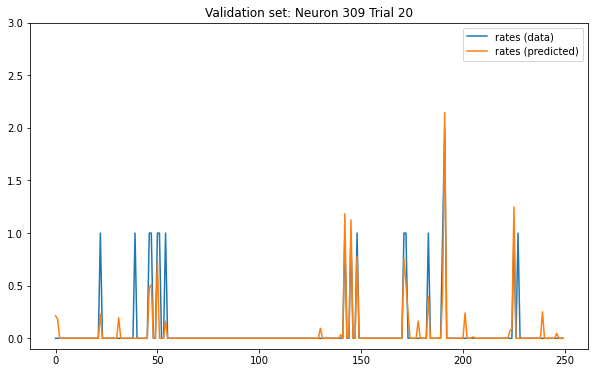

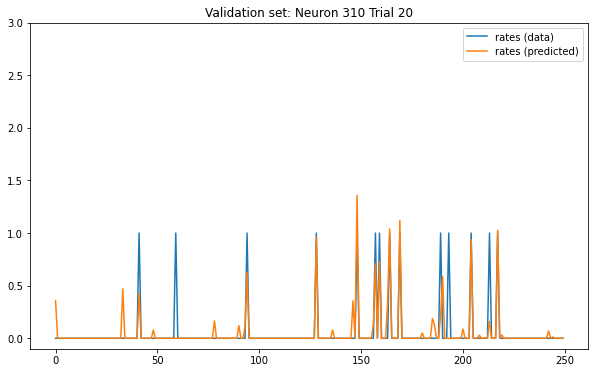

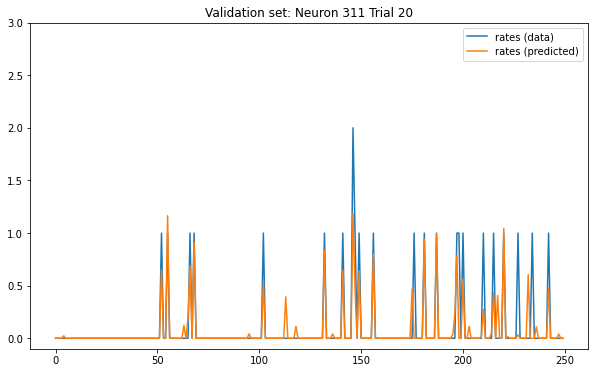

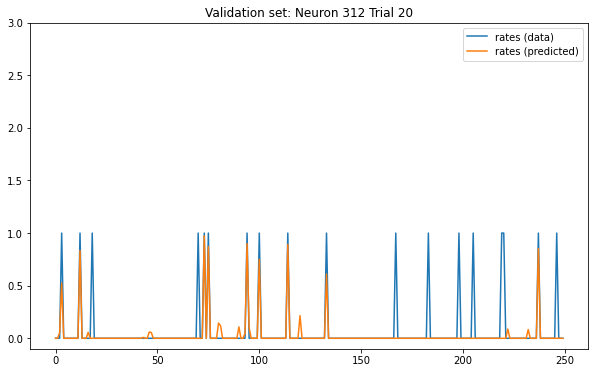

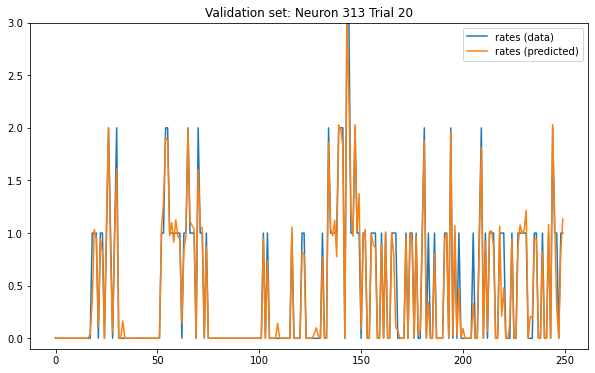

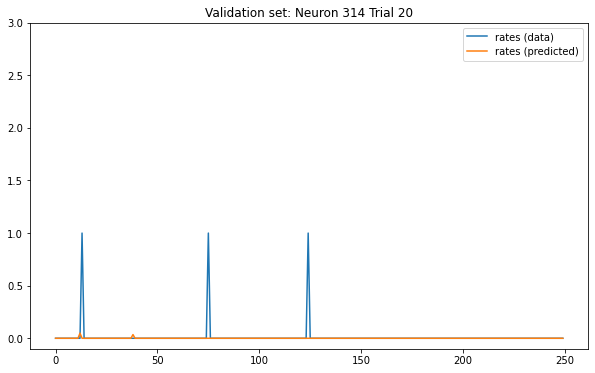

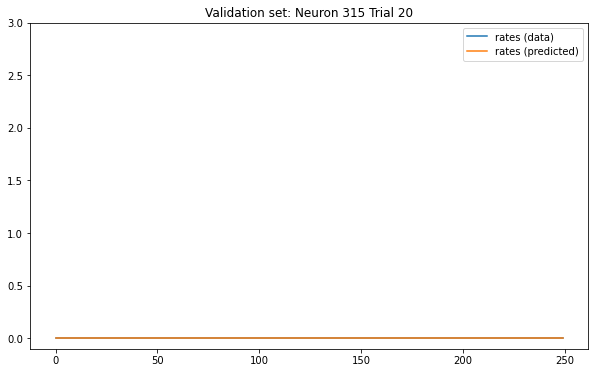

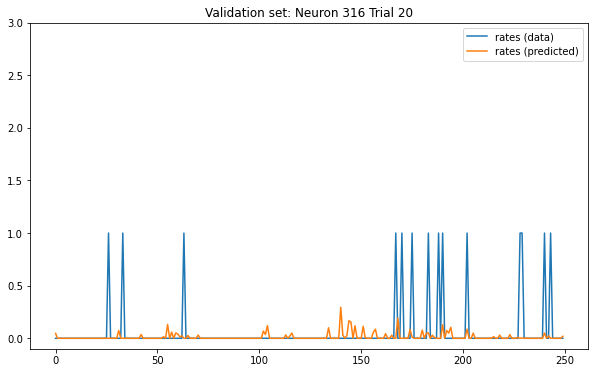

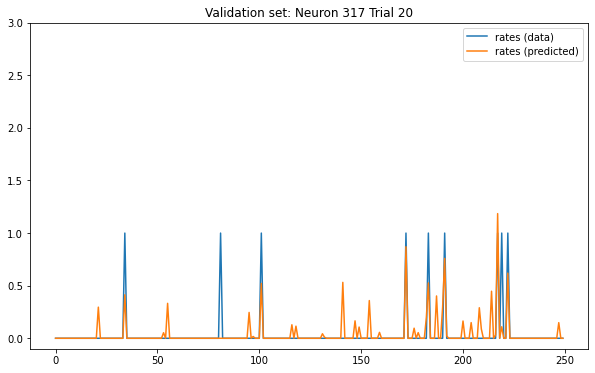

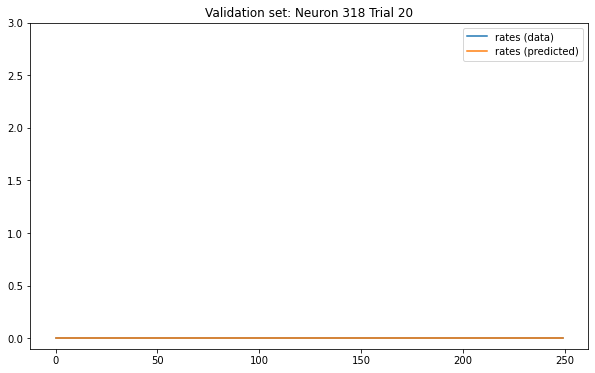

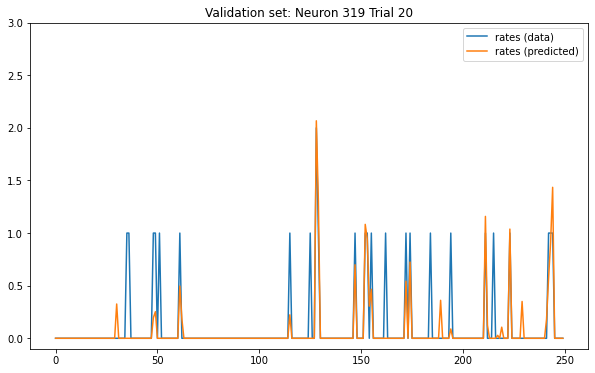

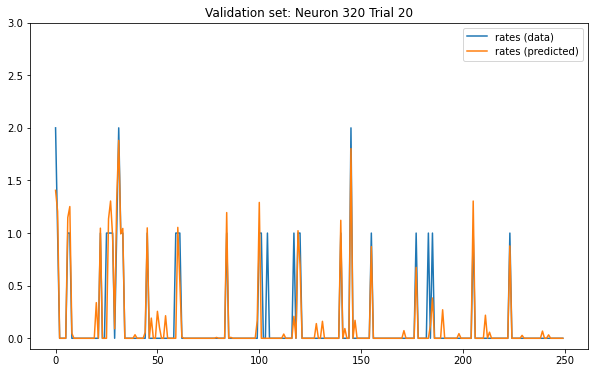

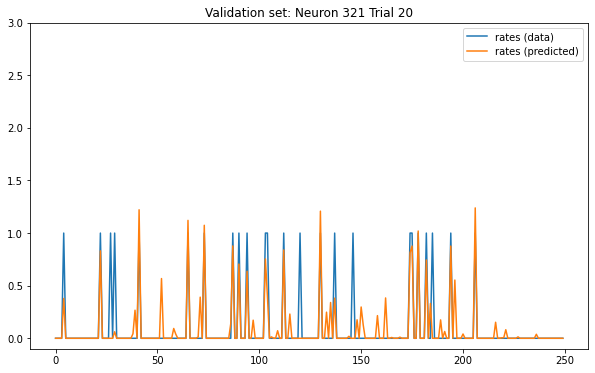

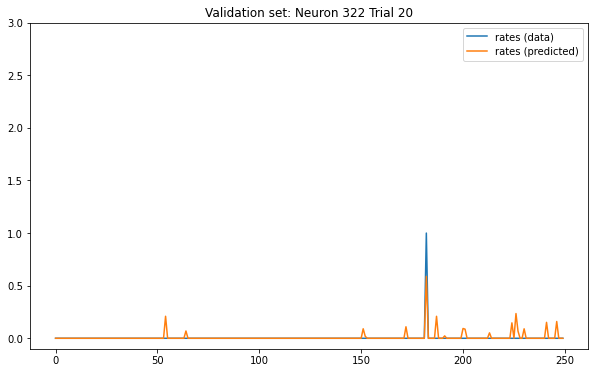

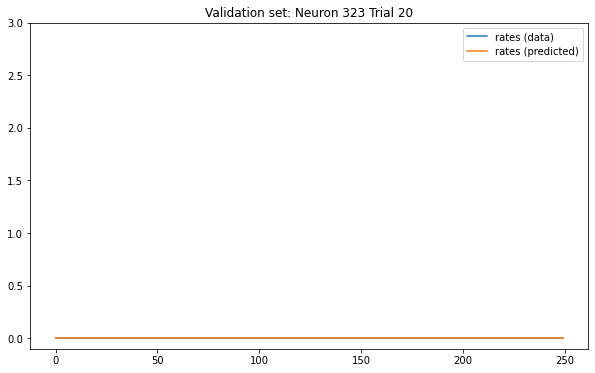

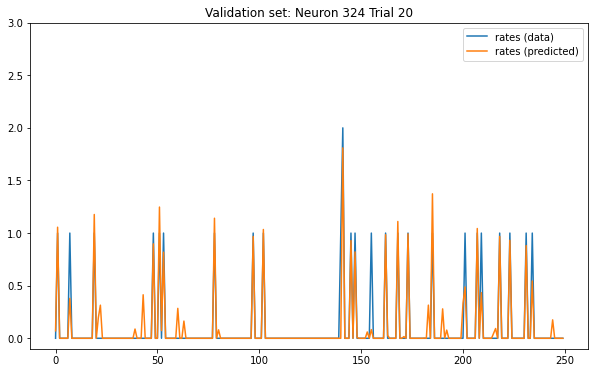

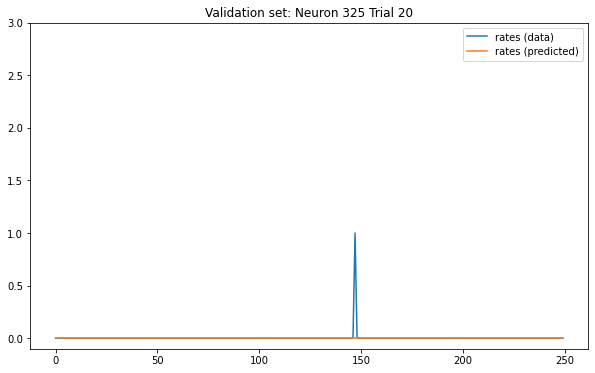

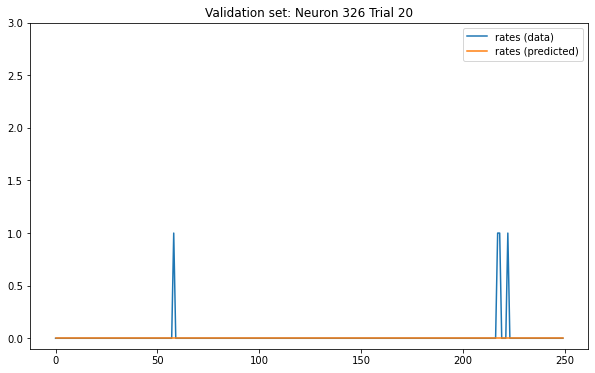

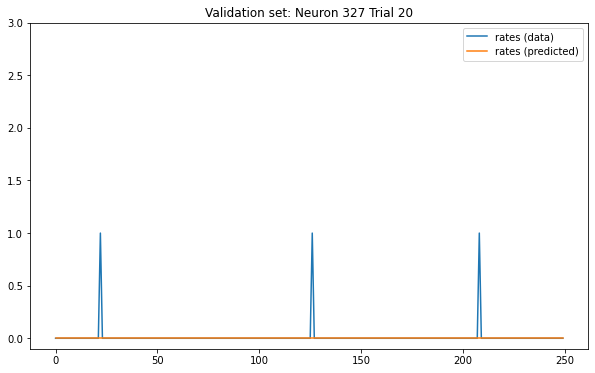

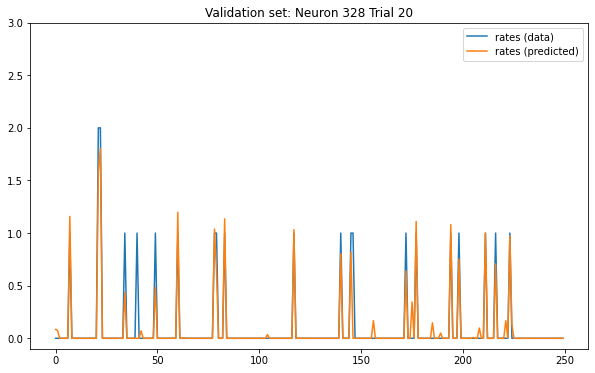

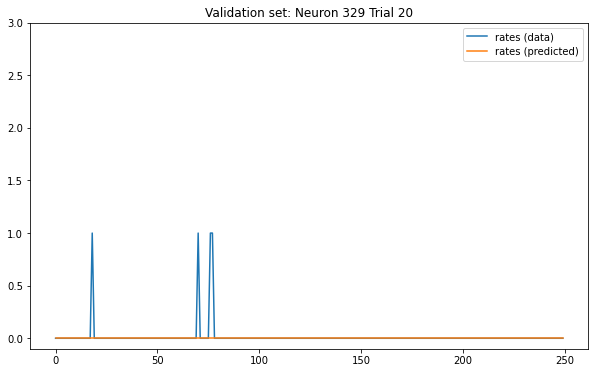

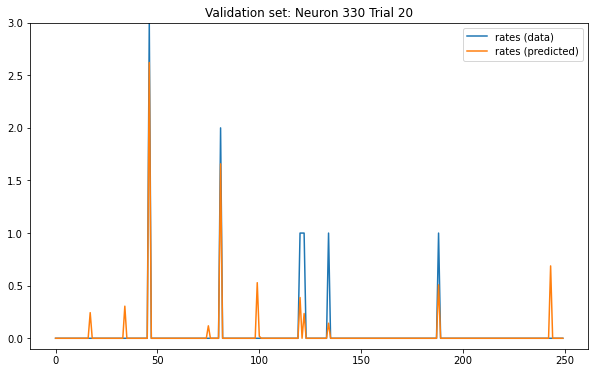

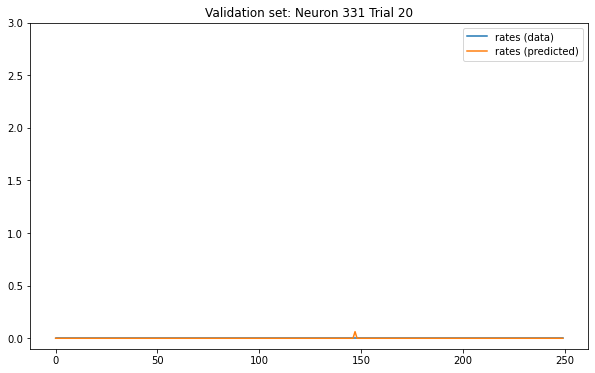

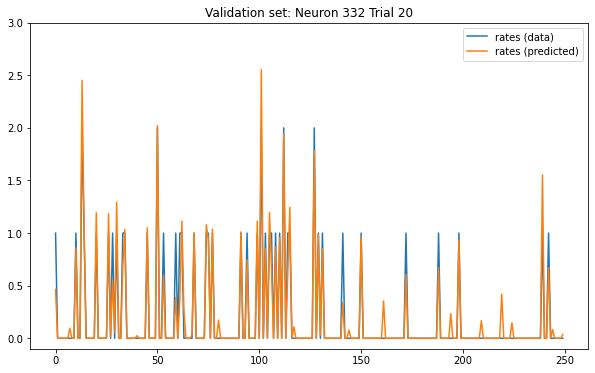

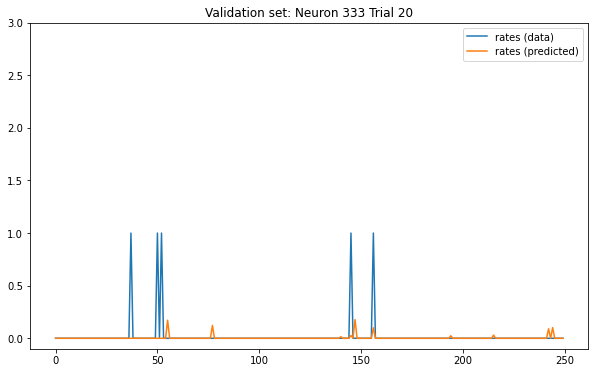

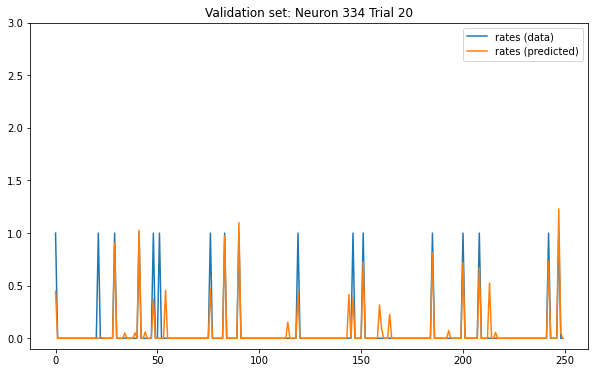

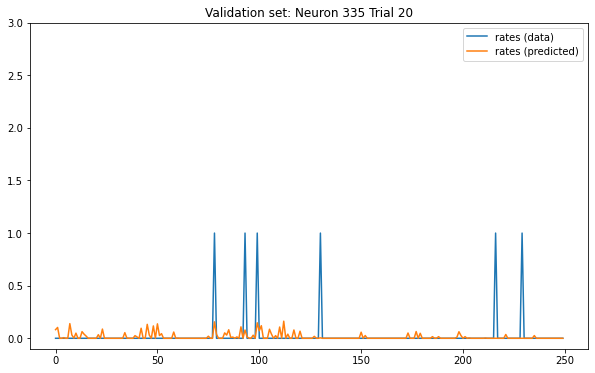

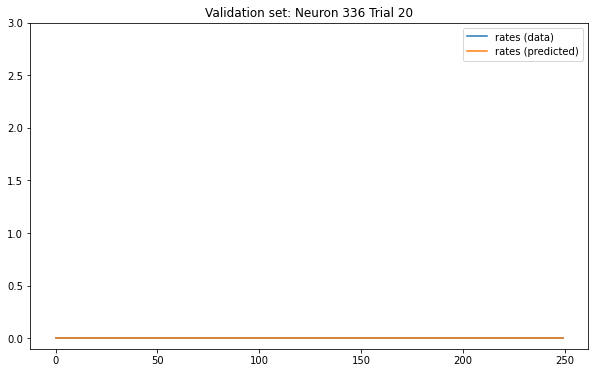

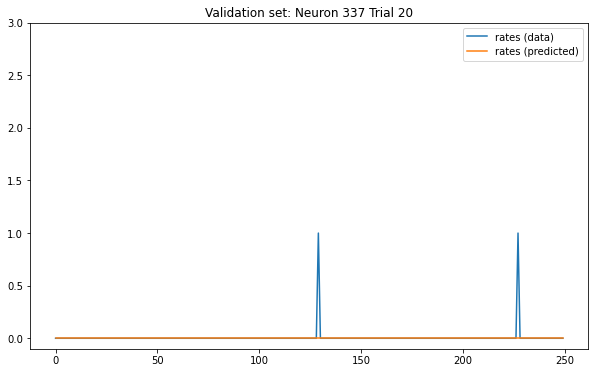

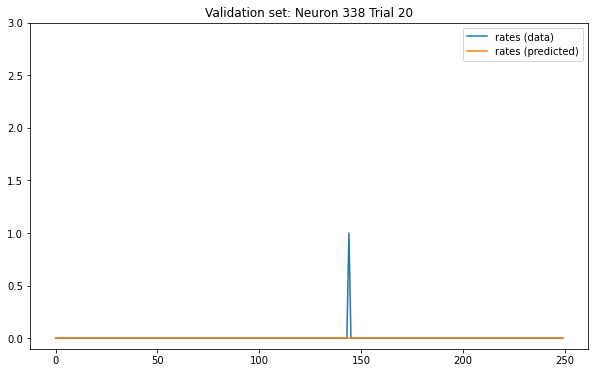

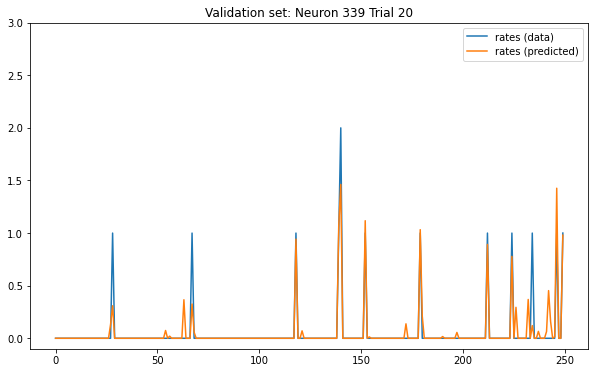

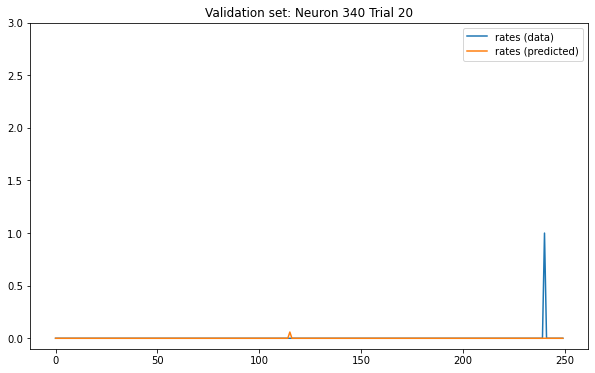

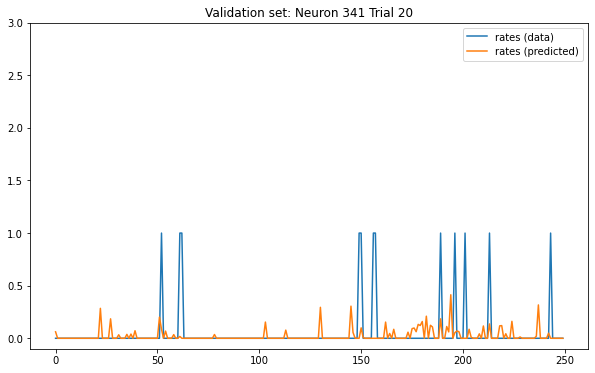

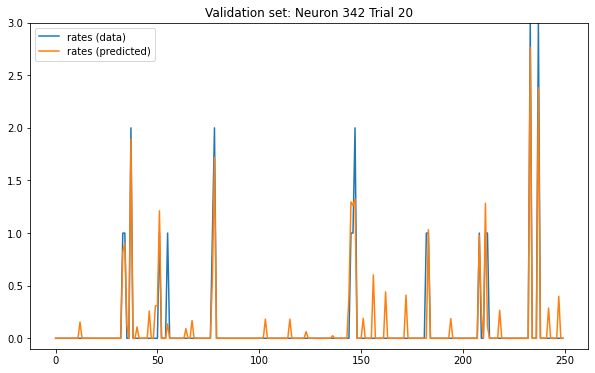

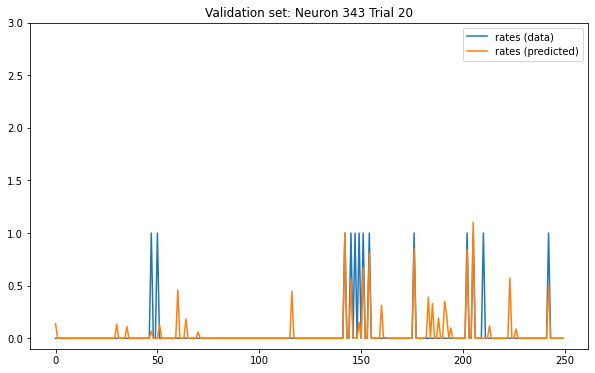

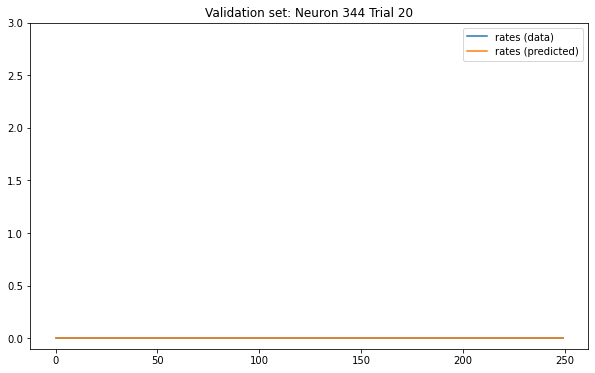

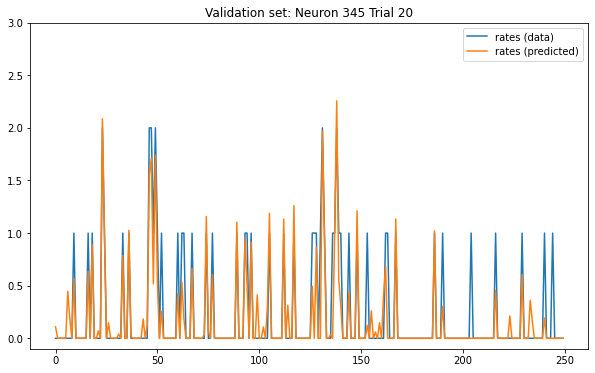

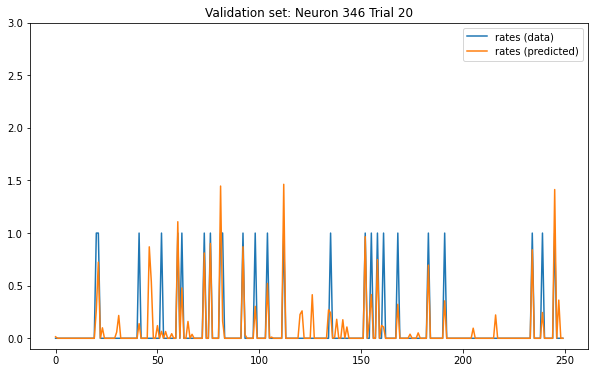

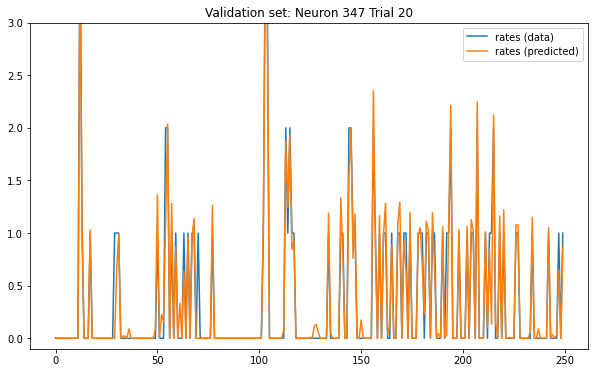

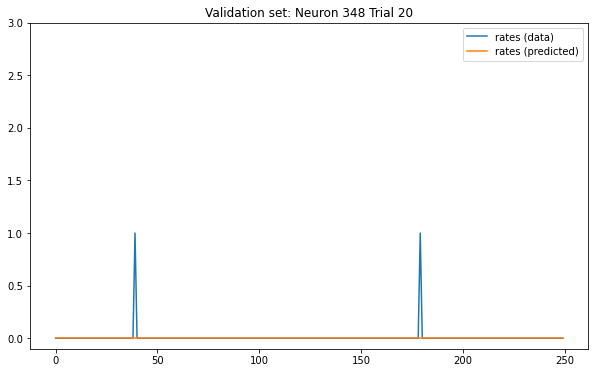

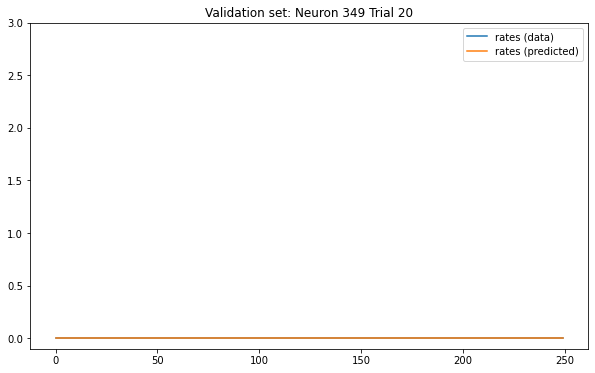

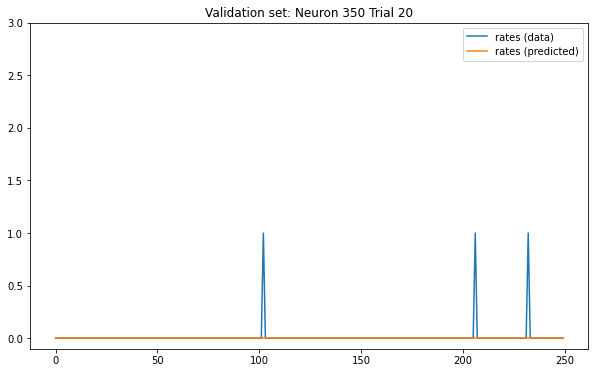

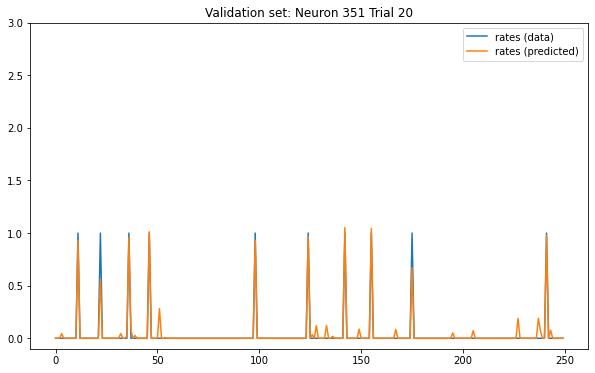

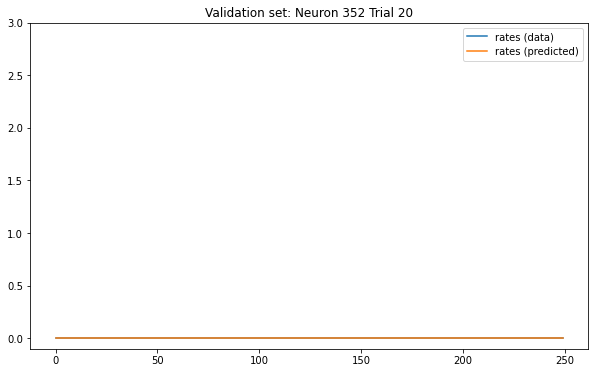

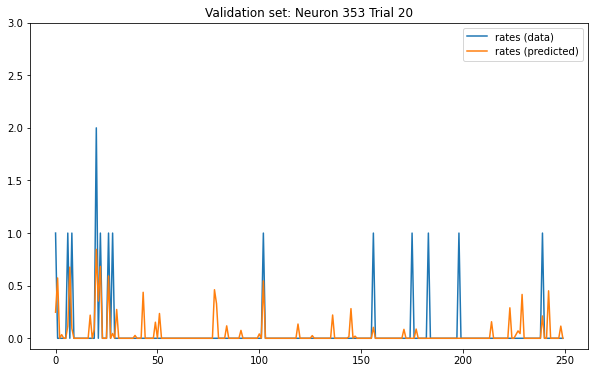

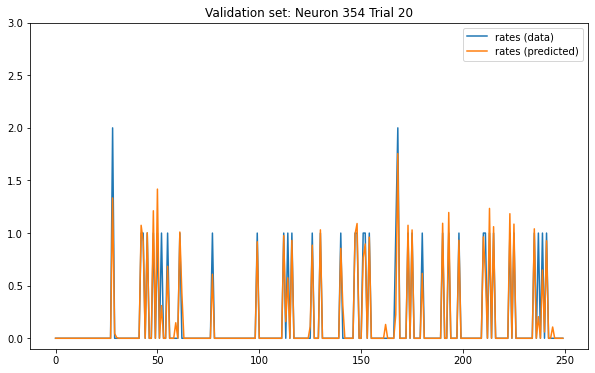

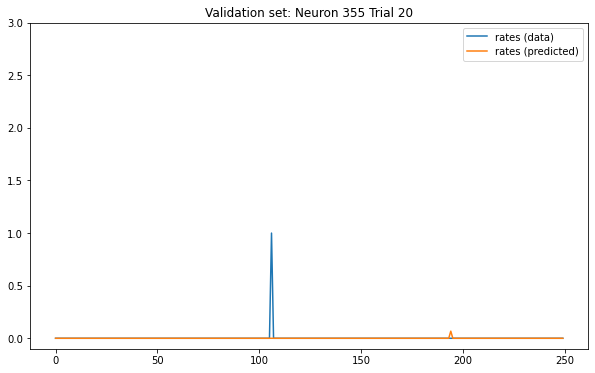

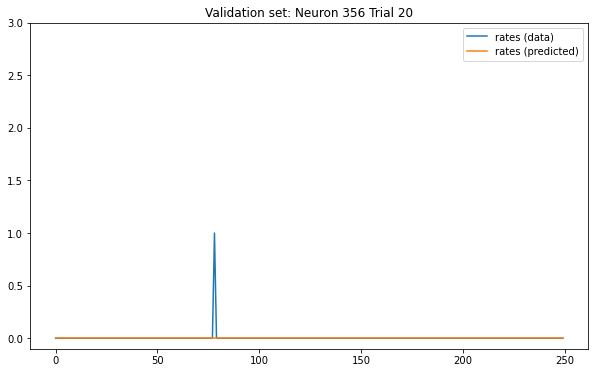

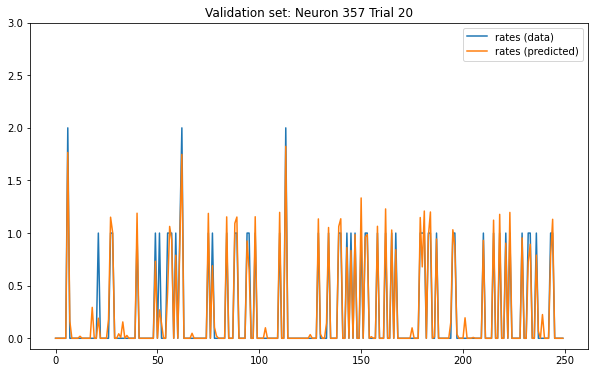

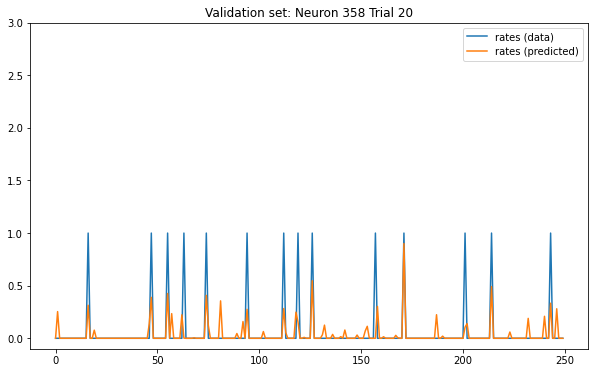

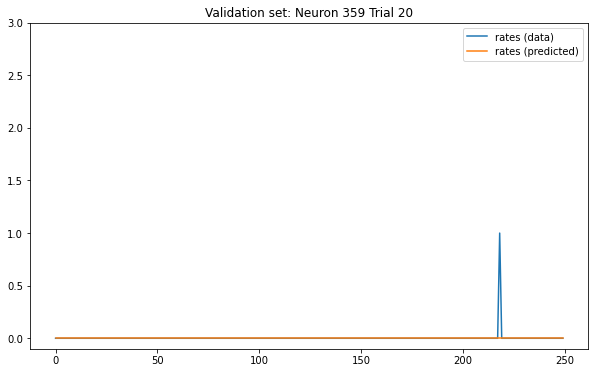

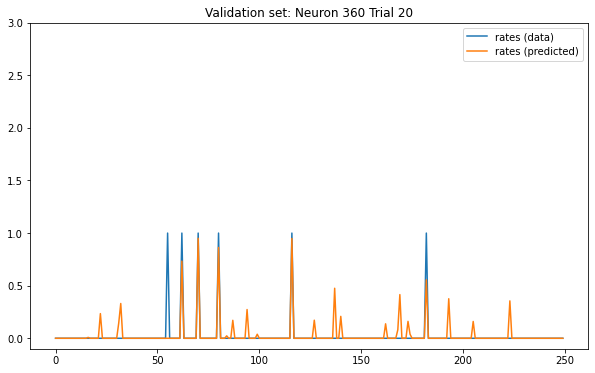

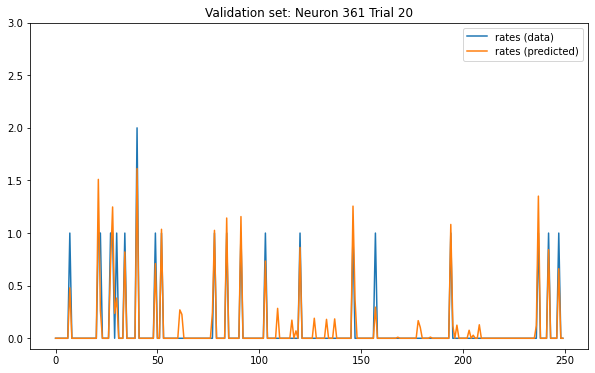

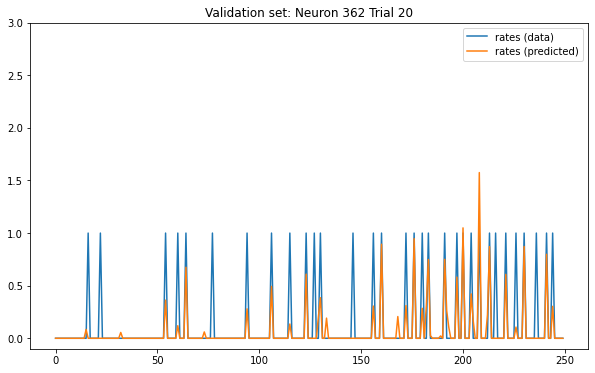

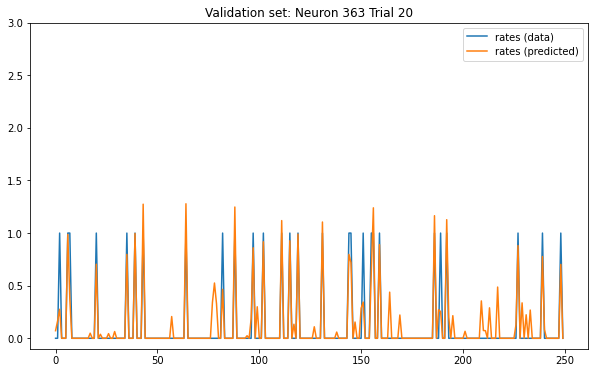

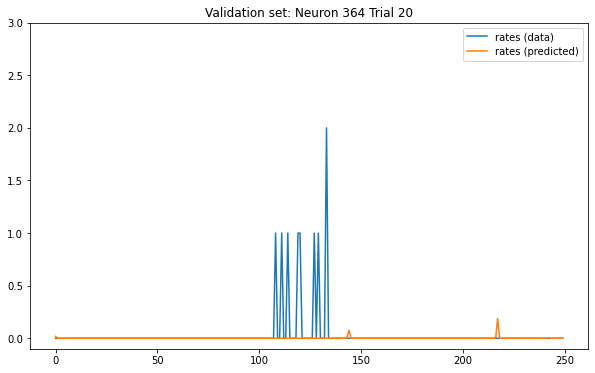

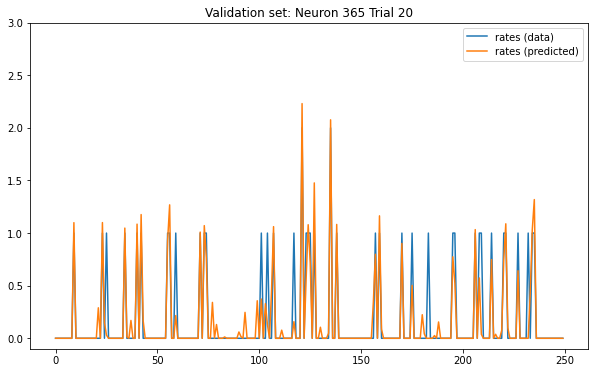

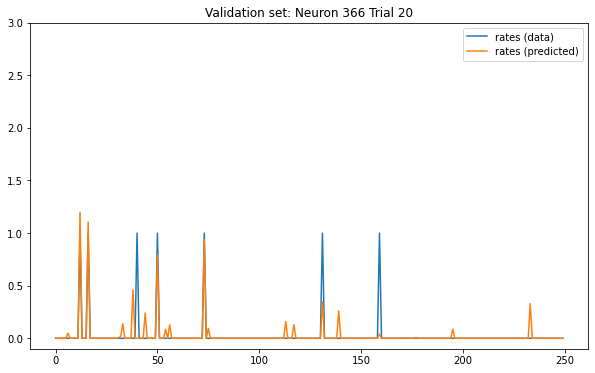

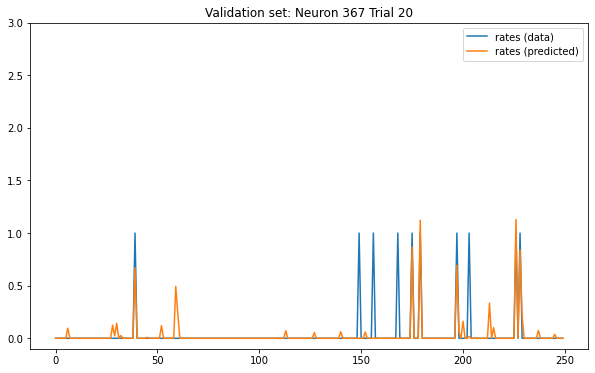

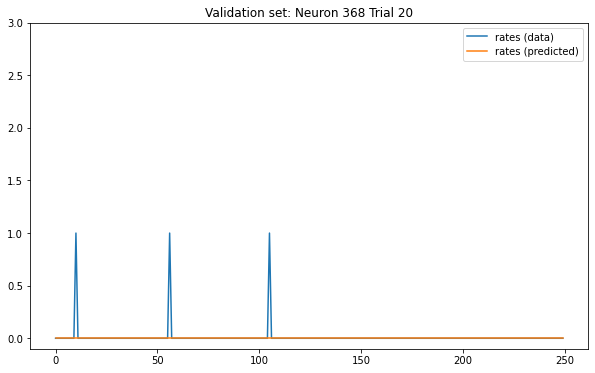

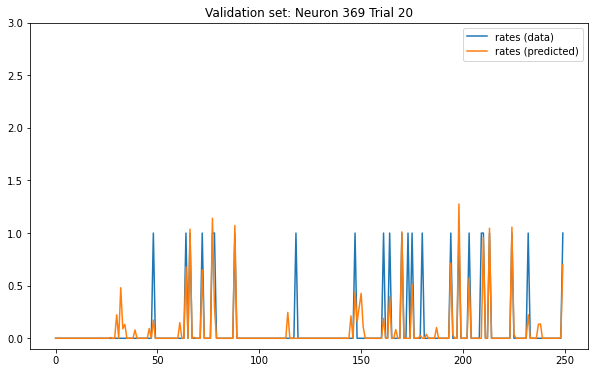

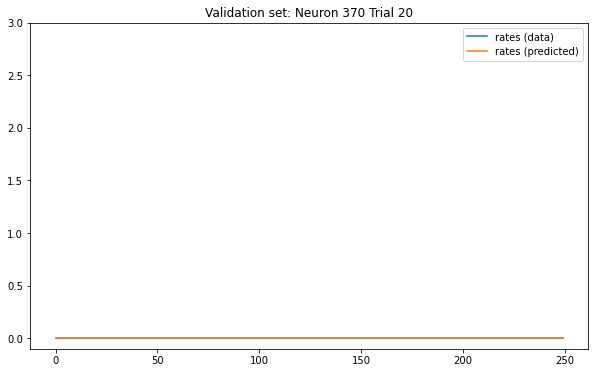

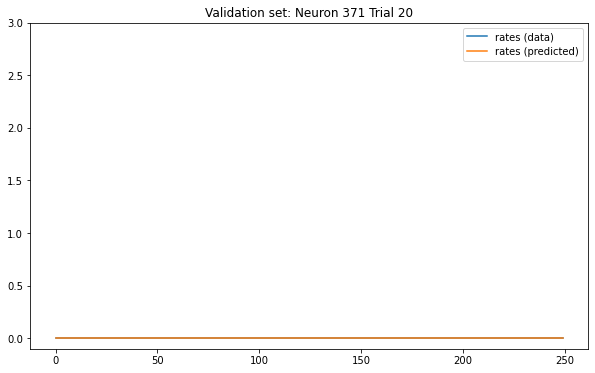

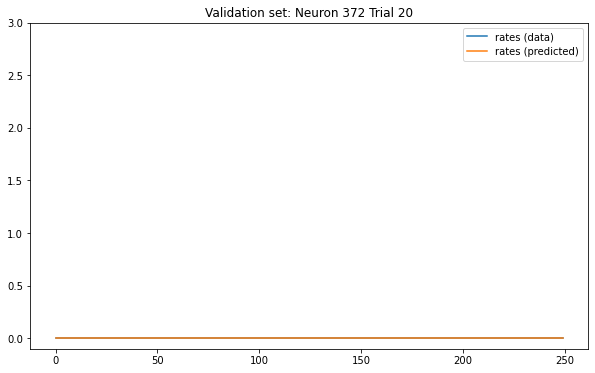

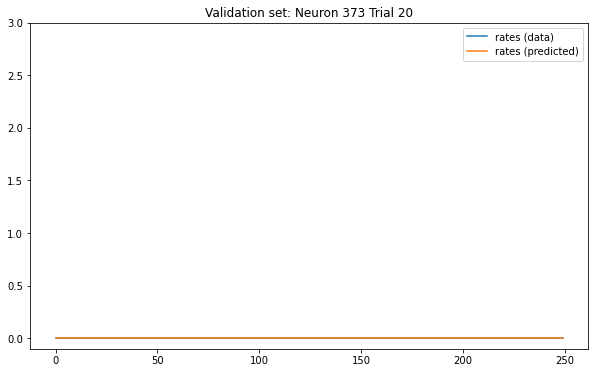

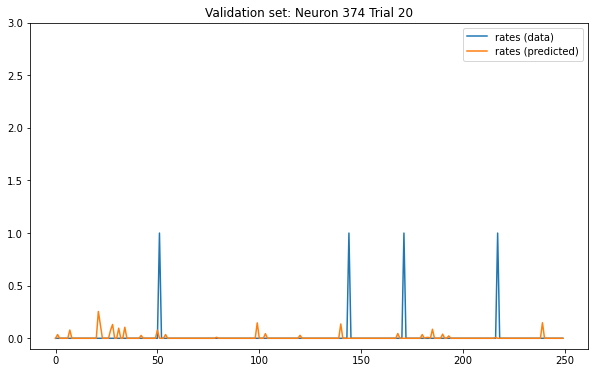

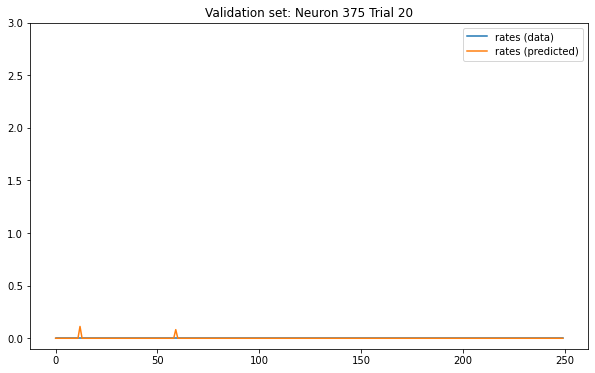

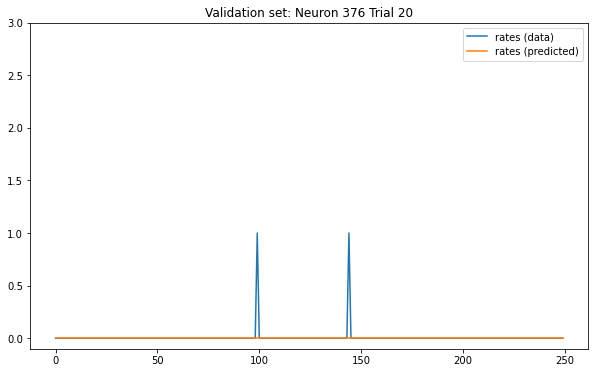

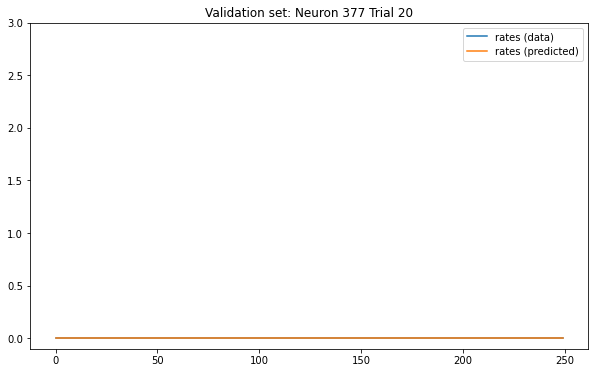

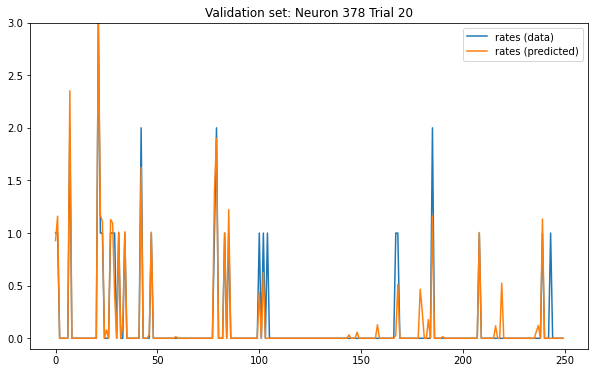

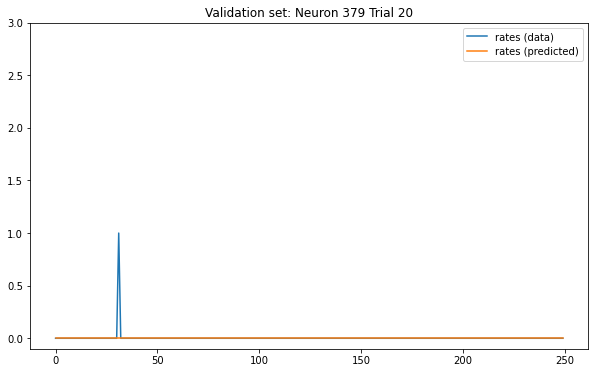

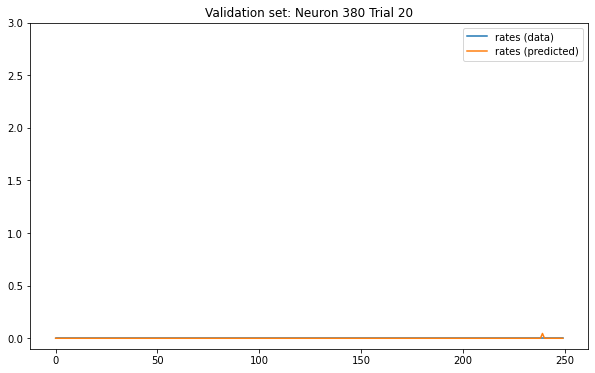

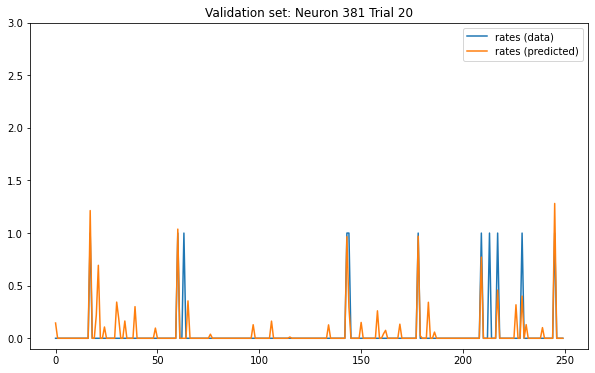

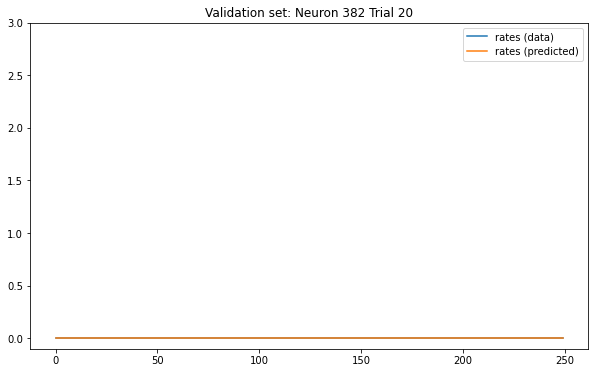

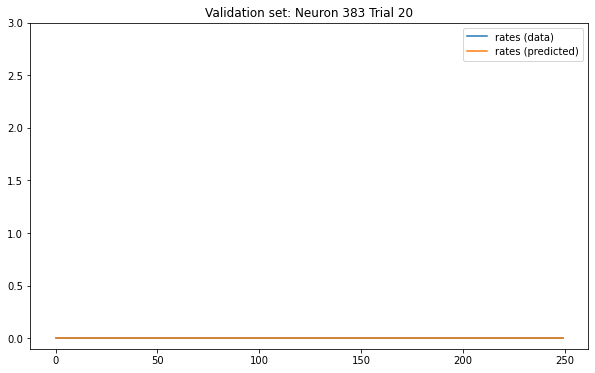

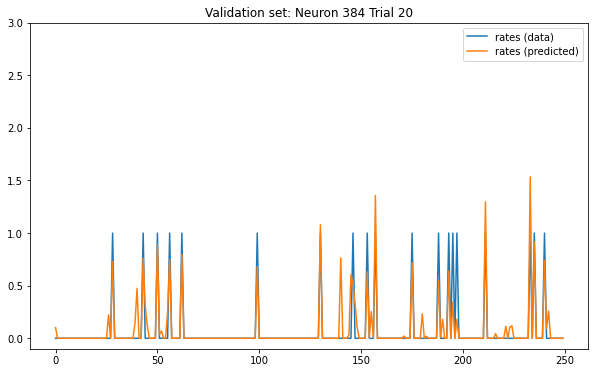

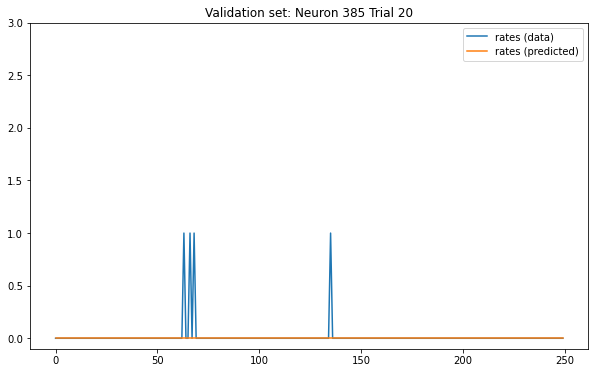

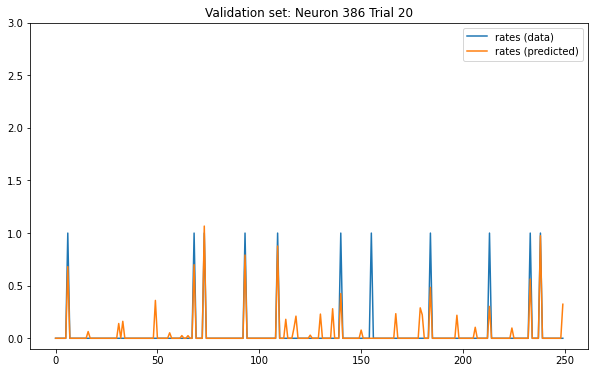

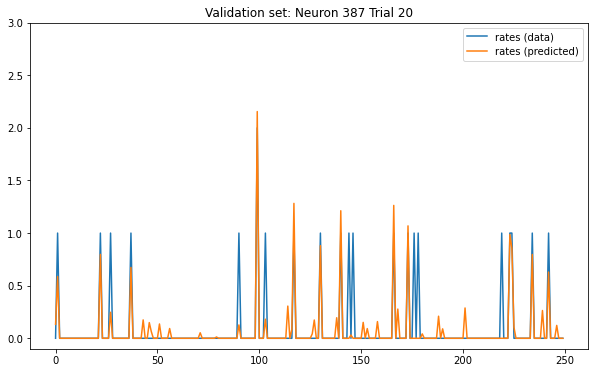

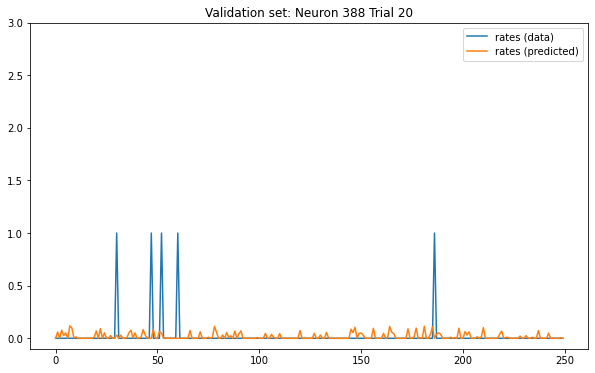

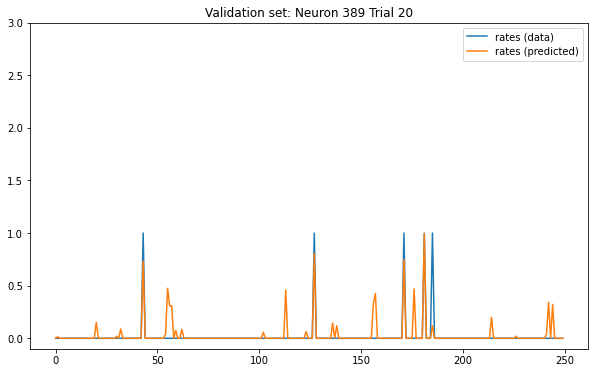

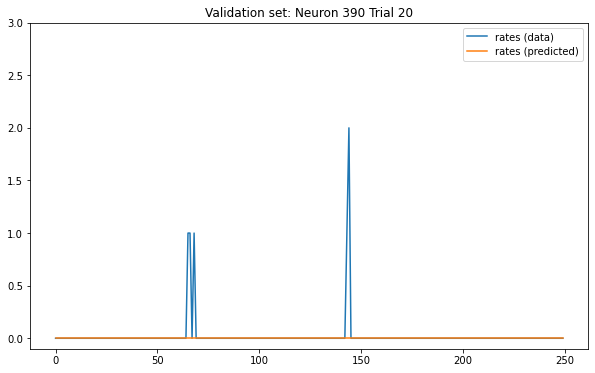

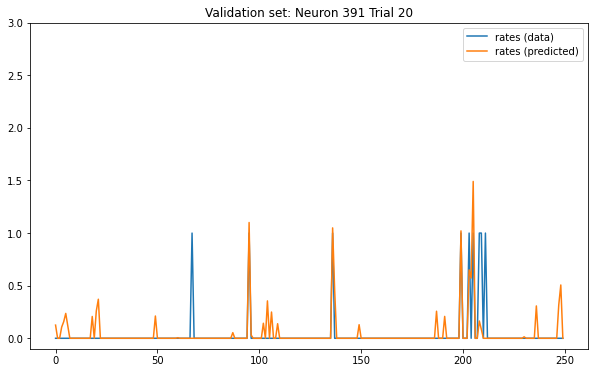

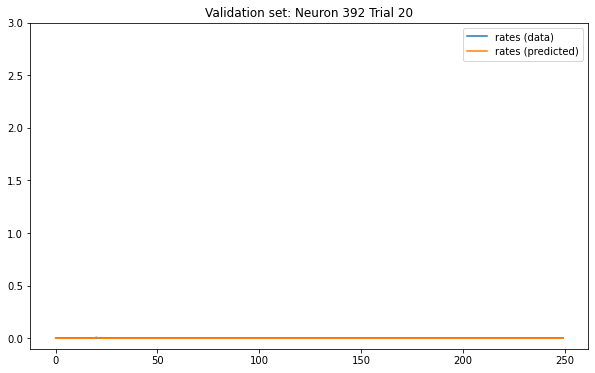

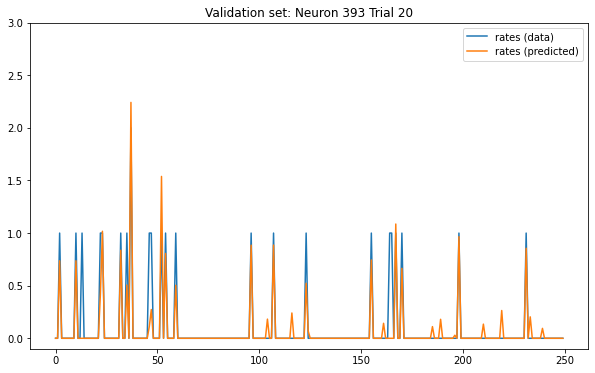

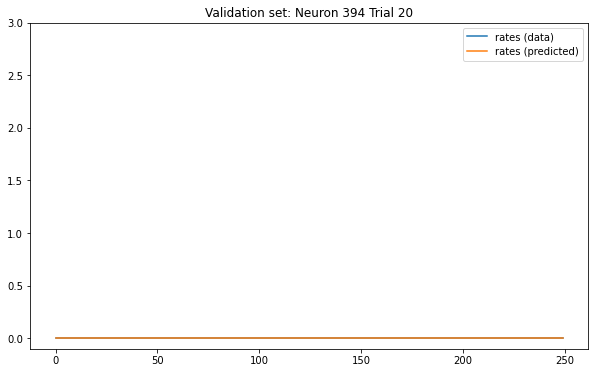

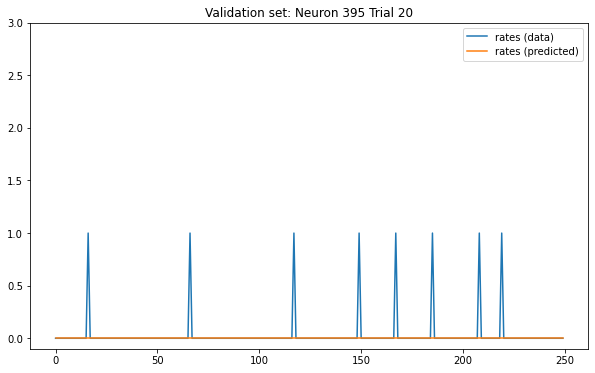

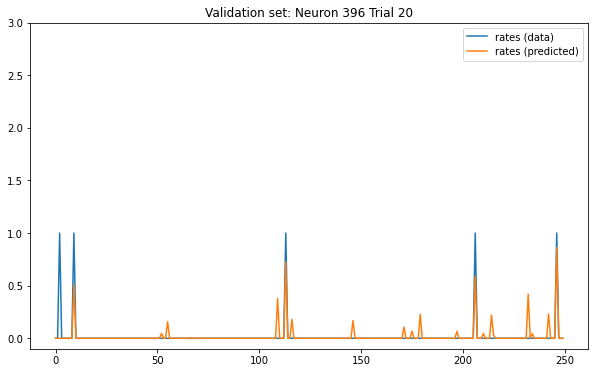

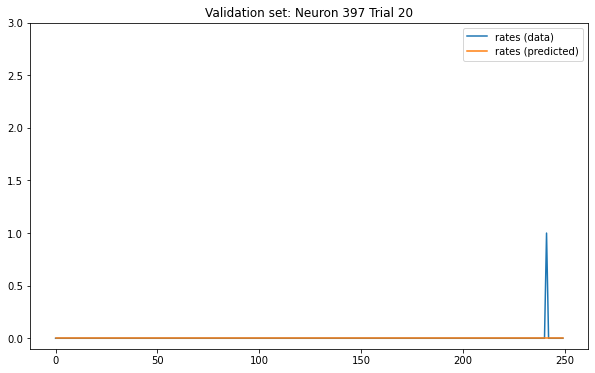

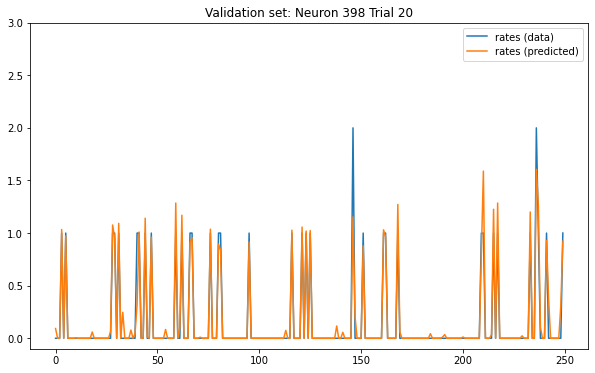

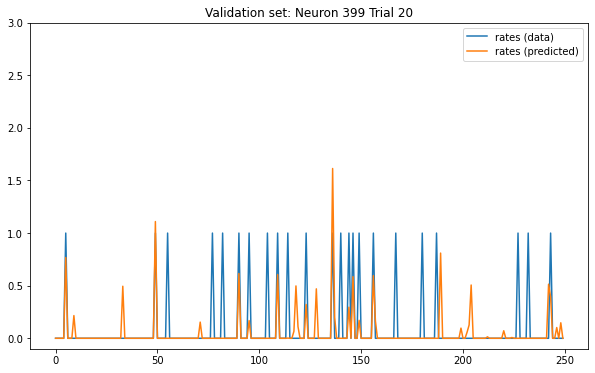

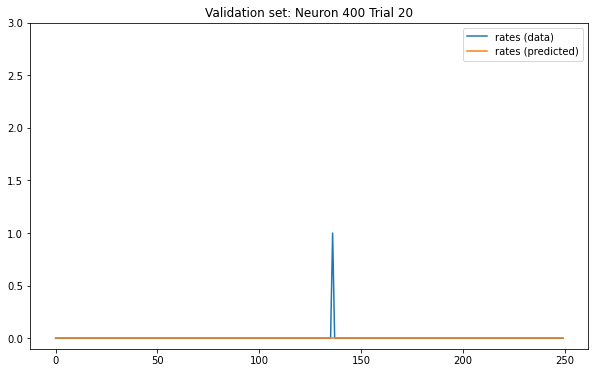

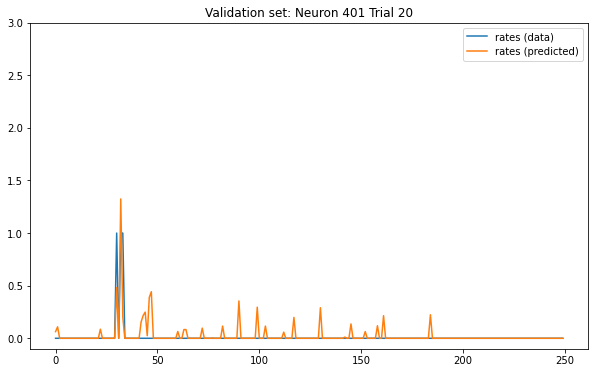

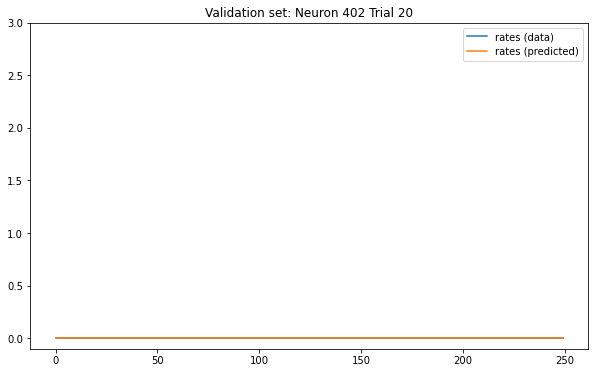

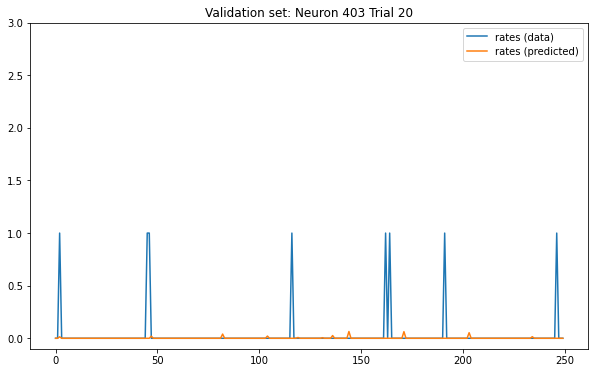

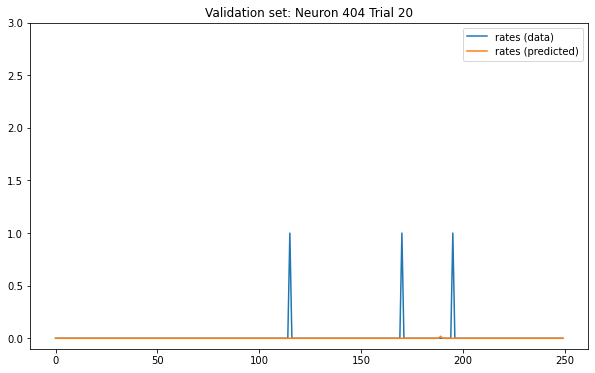

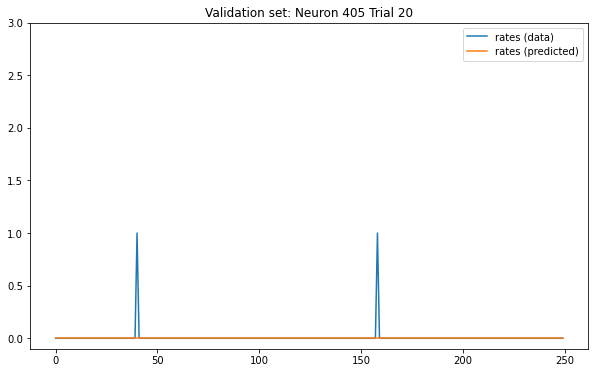

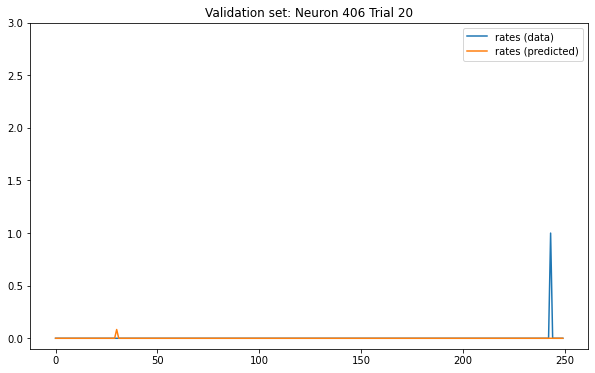

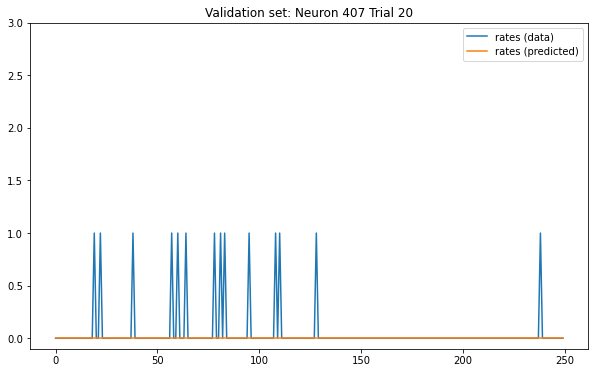

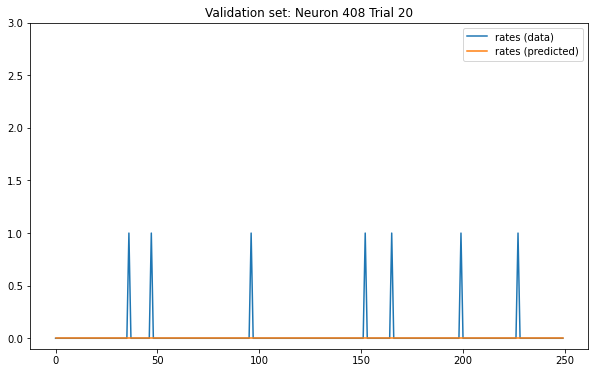

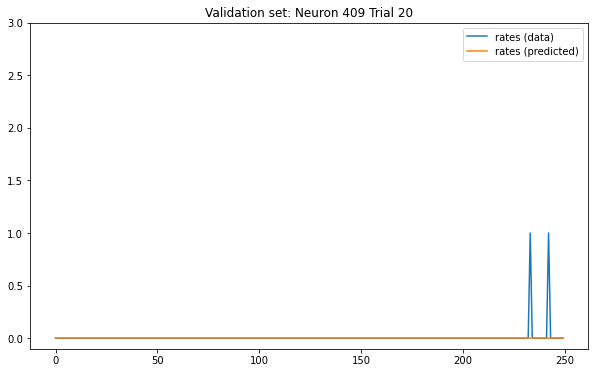

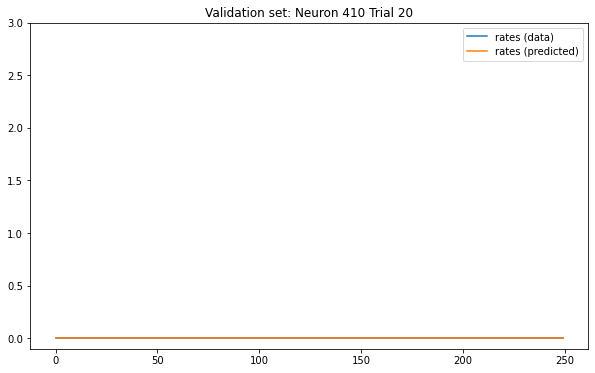

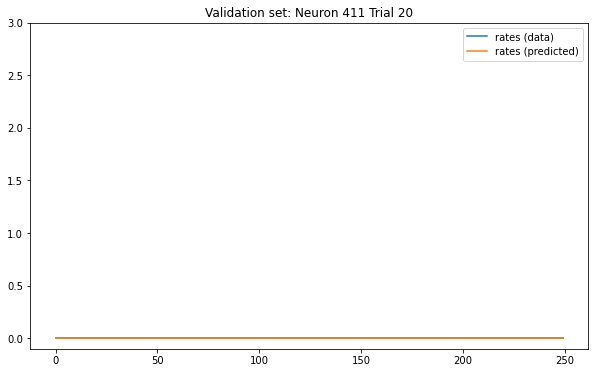

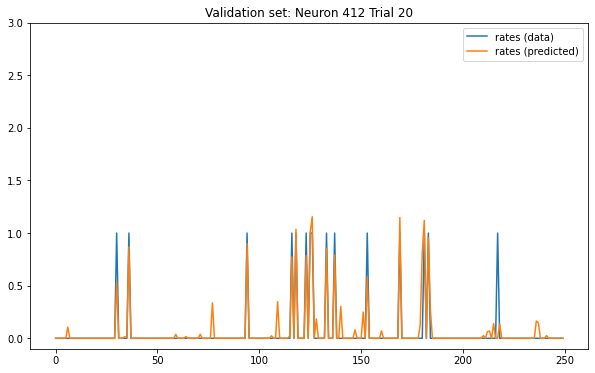

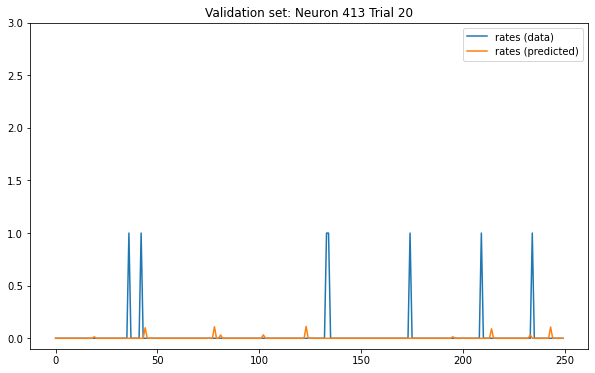

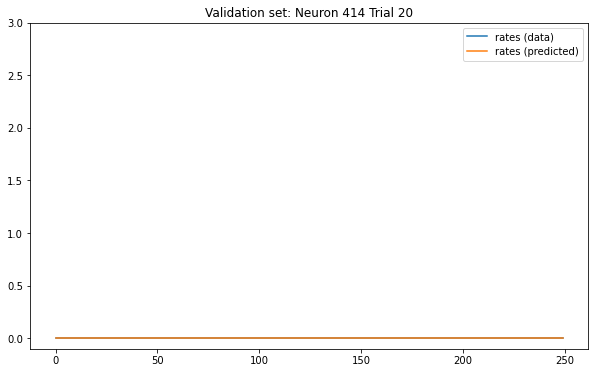

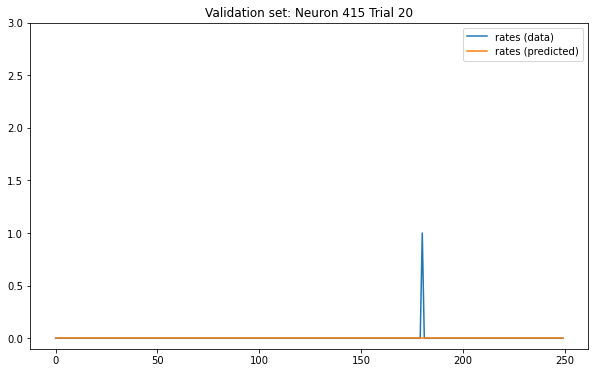

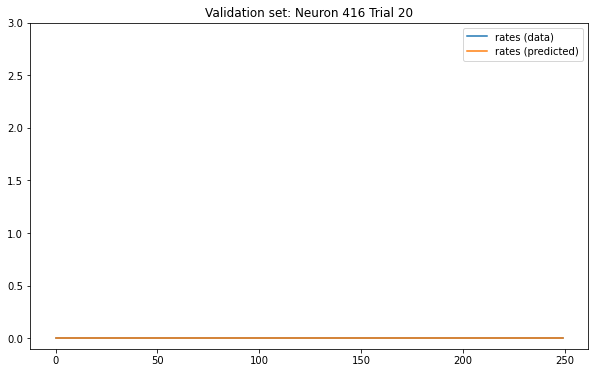

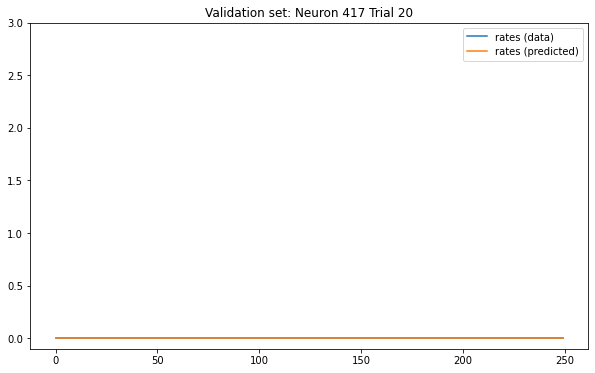

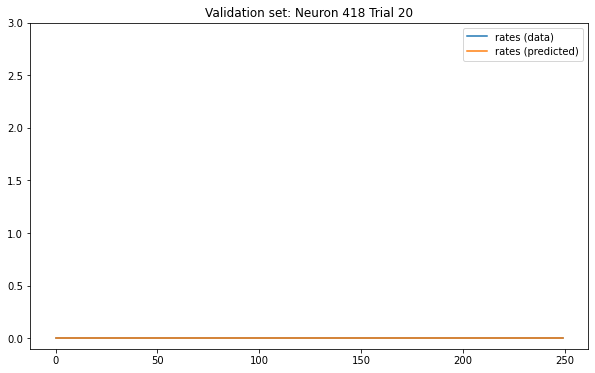

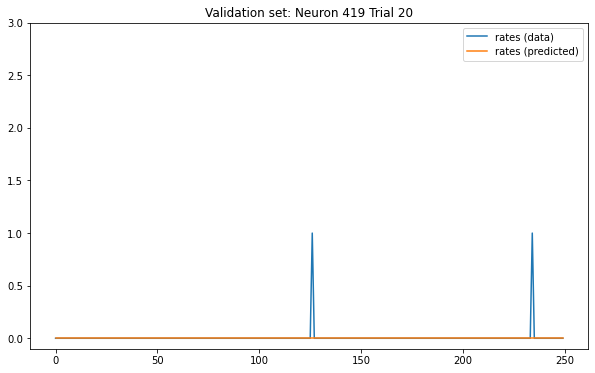

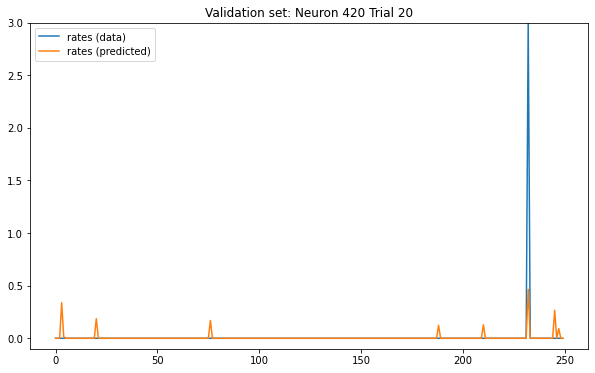

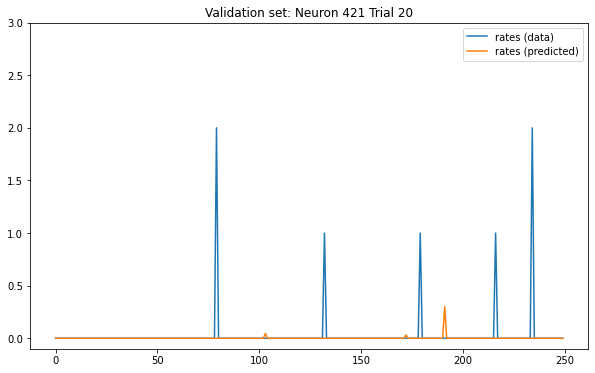

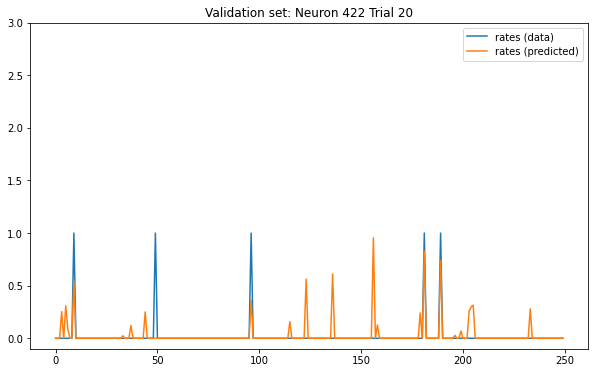

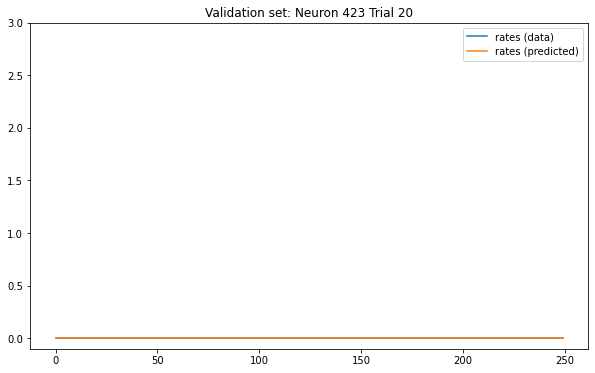

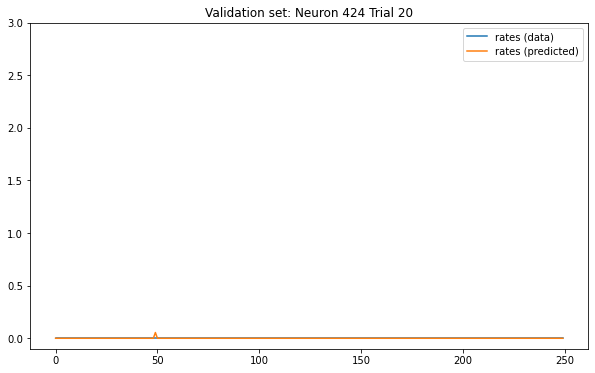

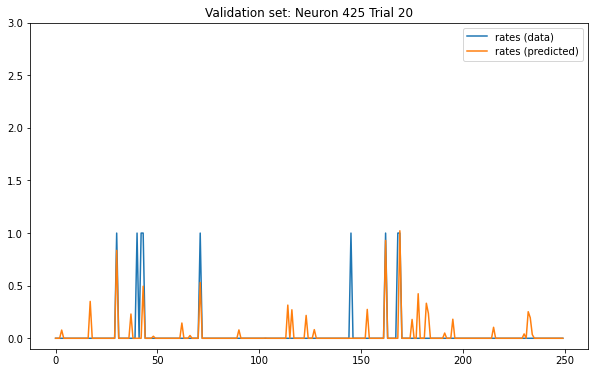

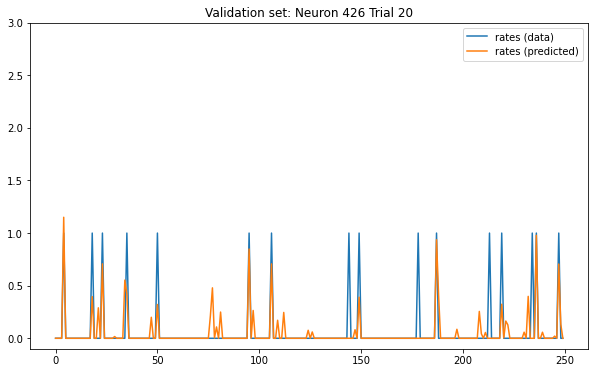

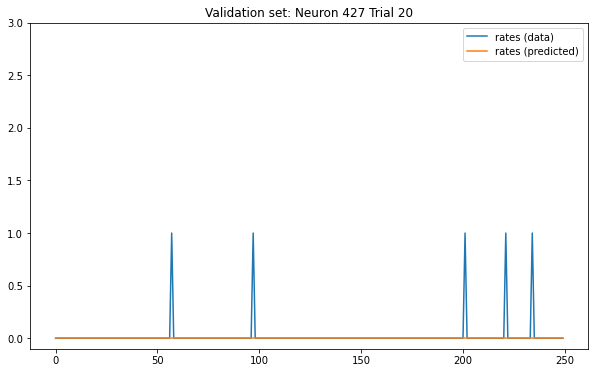

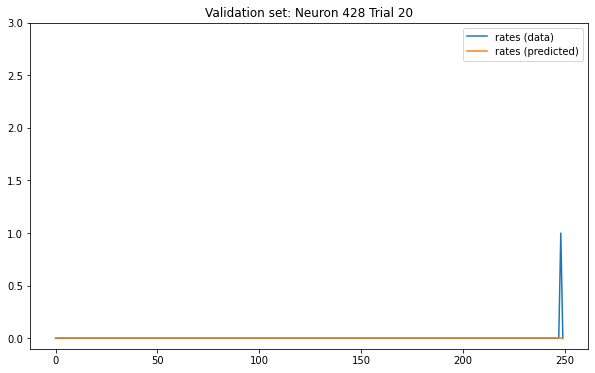

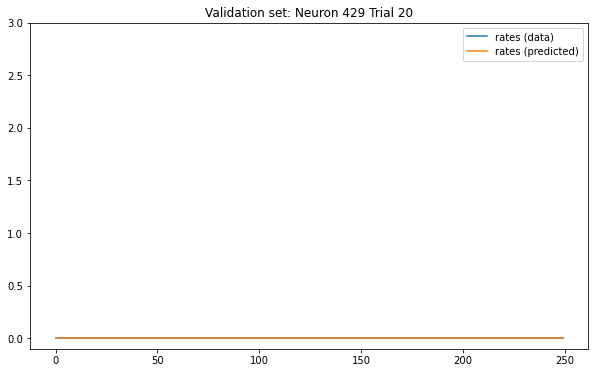

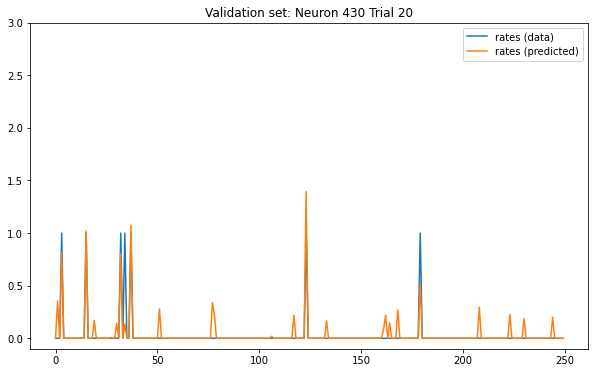

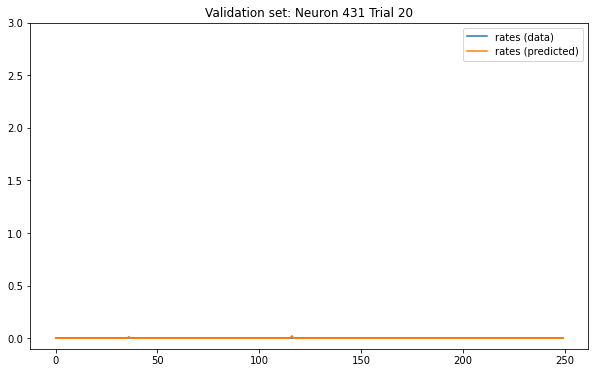

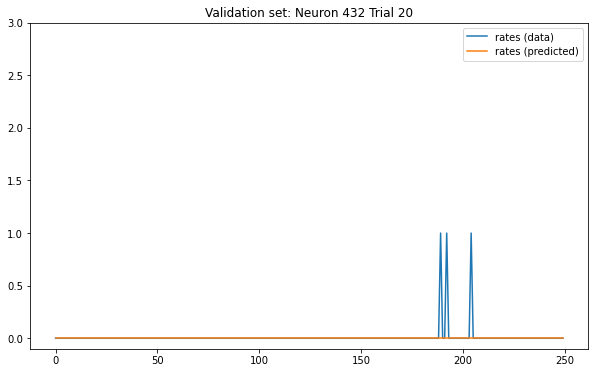

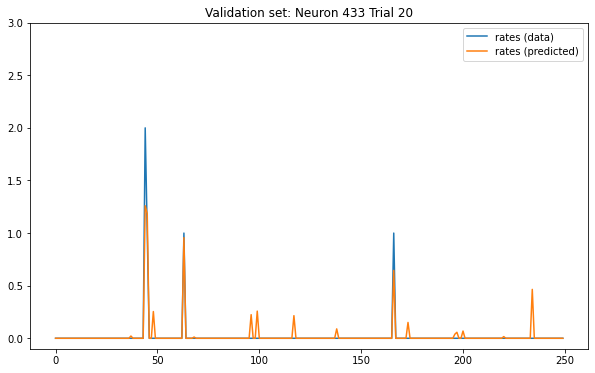

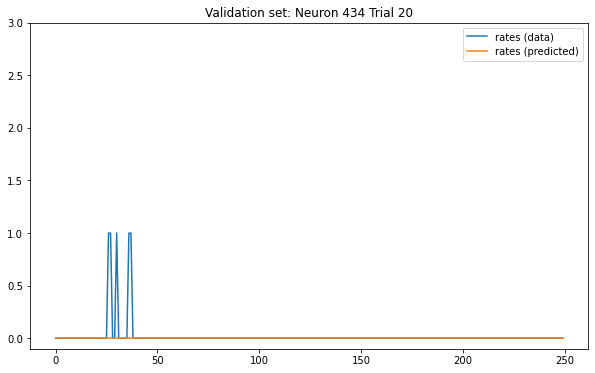

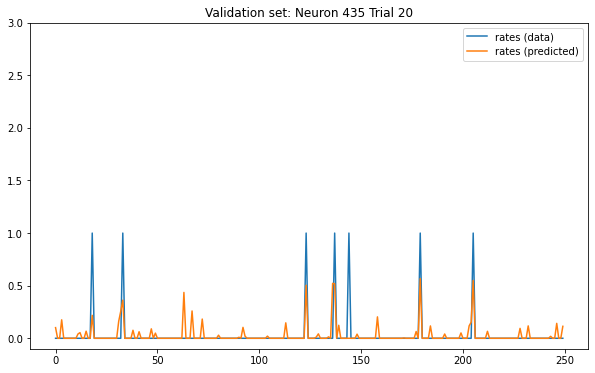

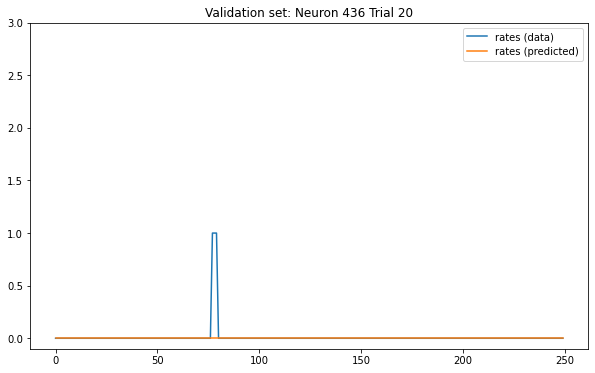

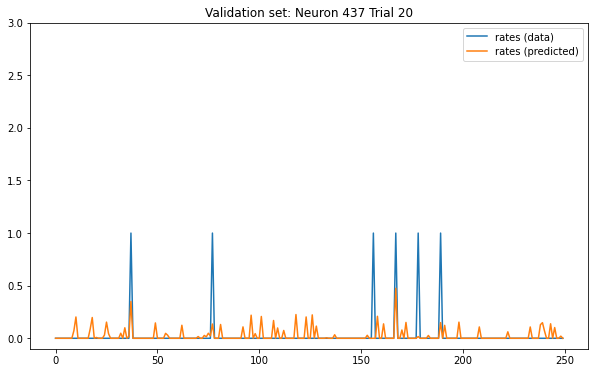

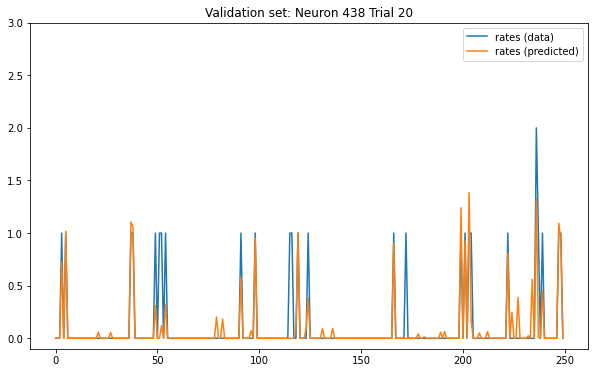

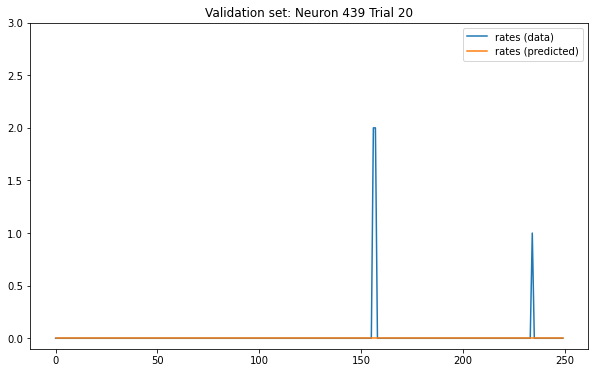

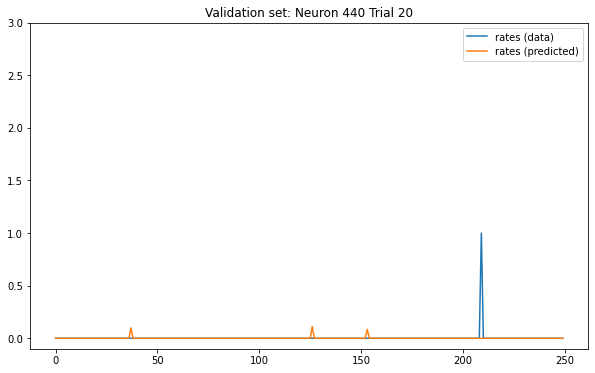

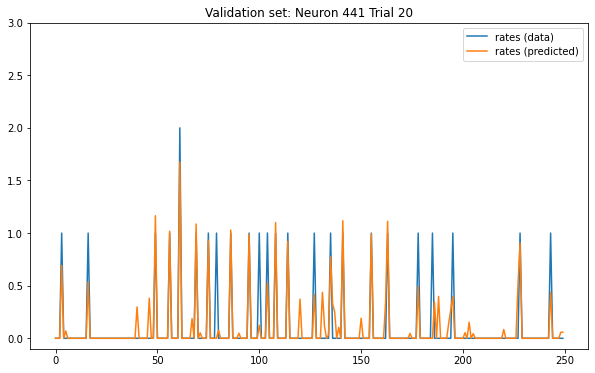

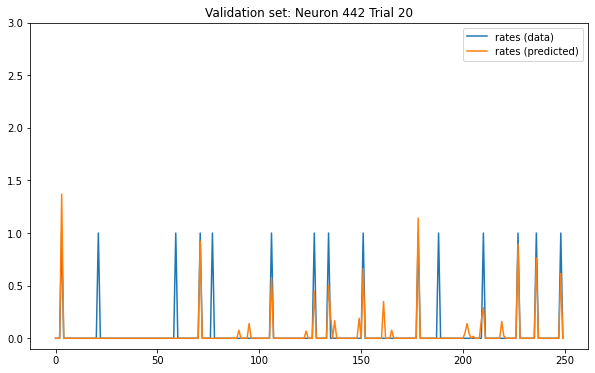

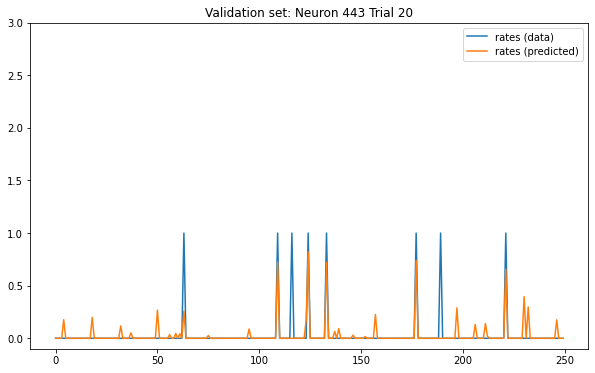

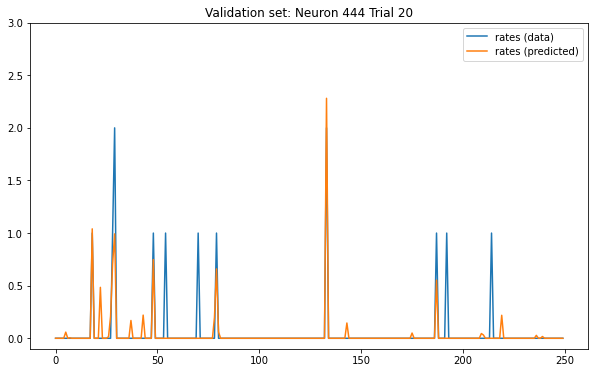

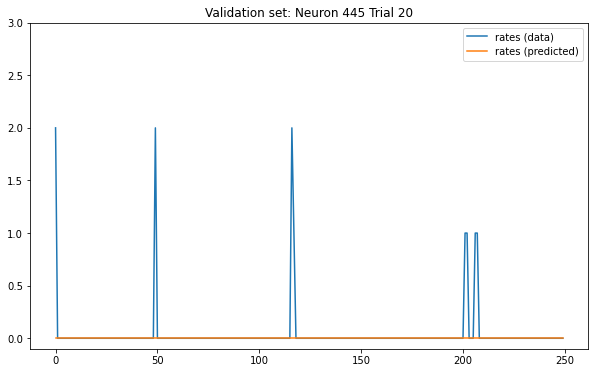

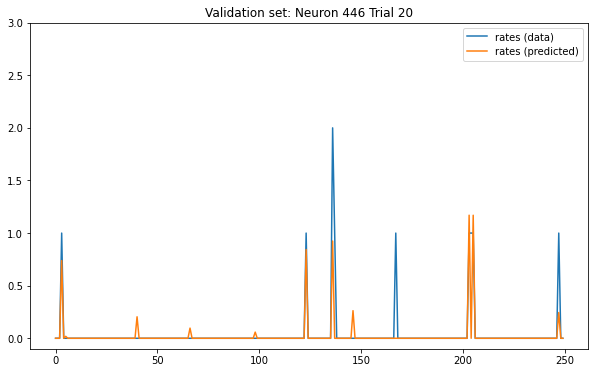

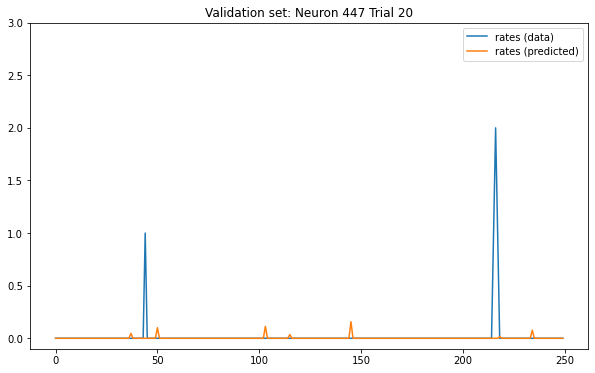

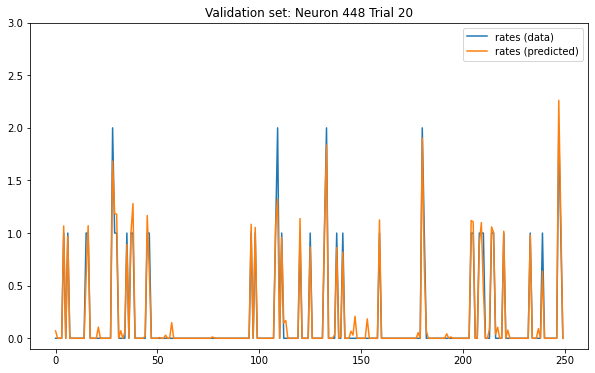

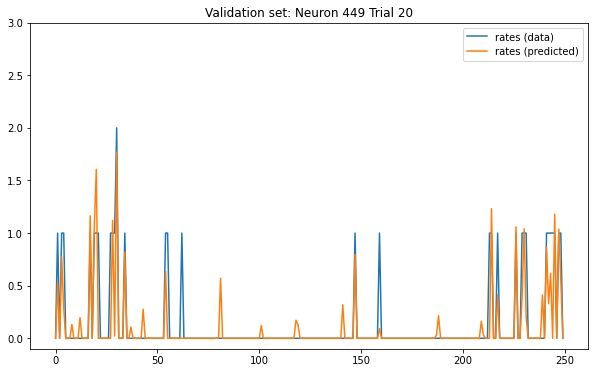

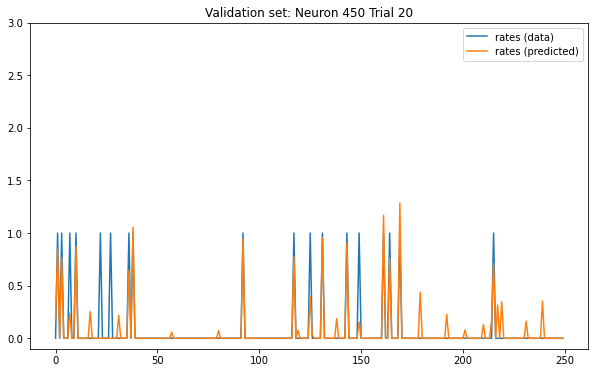

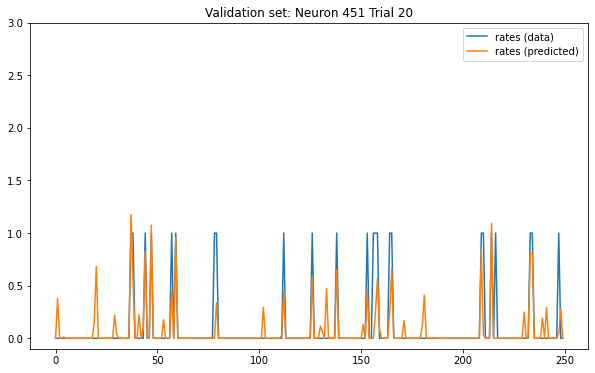

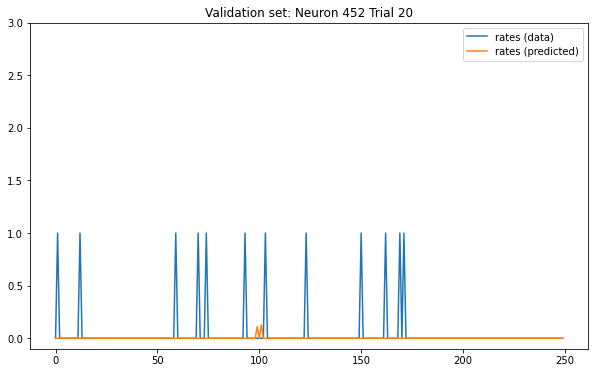

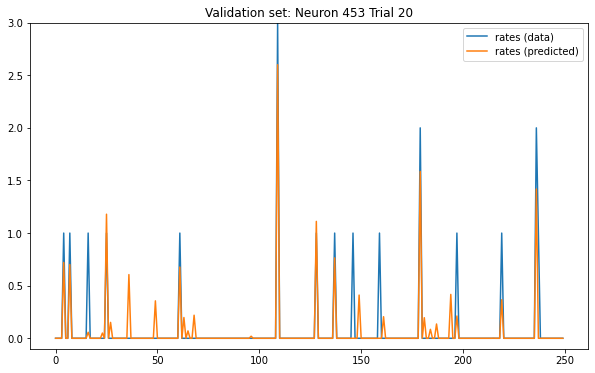

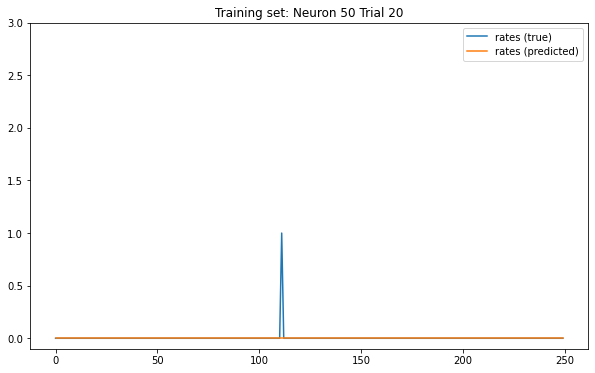

In [11]:
# visualize the performance of the rnn model
netinput=testData
prd=net(netinput)
rpred = prd.detach().cpu().numpy()
# nn_num = 30
ntrial = 20

for nn_num in range(testData.shape[-1]):
    # Plot for Test Data
    plt.figure(figsize=(10, 6))
    plt.plot(testData[:, ntrial, nn_num], label='rates (data)')
    plt.plot(rpred[:,ntrial, nn_num], label='rates (predicted)')
    plt.legend()
    plt.title(f'Validation set: Neuron {nn_num+200} Trial {ntrial}')
    plt.ylim((-0.1, 3))
    plt.show()

# Plot for Training Data
netinput=trainingData
prd=net(netinput)  
rpred = prd.detach().cpu().numpy()
nn_num = 50
ntrial = 20
plt.figure(figsize=(10, 6))
#plt.plot(fake_spk_rates[:,ntrial, nn_num], label='rates (true)')
plt.plot( trainingData[:, ntrial, nn_num], label='spikes')
plt.plot(rpred[:,ntrial, nn_num], label='rates (predicted)')

plt.legend(['rates (true)', 'rates (predicted)', 'spikes'])
plt.title(f'Training set: Neuron {nn_num} Trial {ntrial}')
plt.ylim((-0.1, 3))
plt.show()

In [12]:
## next: try the model with the real data

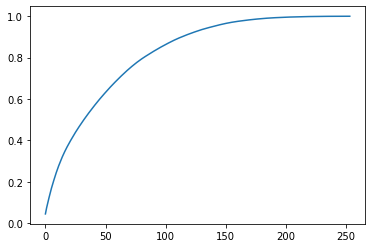

In [13]:
from sklearn.decomposition import PCA
pca = PCA().fit(trainingData.reshape(-1, trainingData.shape[-1]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [14]:
np.concatenate([np.arange(trainingData.shape[-1]).reshape(-1,1), pca.explained_variance_ratio_.cumsum().reshape(-1,1)], -1)

array([[0.00000000e+00, 4.48699596e-02],
       [1.00000000e+00, 7.45629559e-02],
       [2.00000000e+00, 9.99946819e-02],
       [3.00000000e+00, 1.23453675e-01],
       [4.00000000e+00, 1.46759594e-01],
       [5.00000000e+00, 1.68610956e-01],
       [6.00000000e+00, 1.88574643e-01],
       [7.00000000e+00, 2.07630186e-01],
       [8.00000000e+00, 2.25949413e-01],
       [9.00000000e+00, 2.44155968e-01],
       [1.00000000e+01, 2.60797914e-01],
       [1.10000000e+01, 2.76855726e-01],
       [1.20000000e+01, 2.91687358e-01],
       [1.30000000e+01, 3.06135853e-01],
       [1.40000000e+01, 3.20065812e-01],
       [1.50000000e+01, 3.33332379e-01],
       [1.60000000e+01, 3.45323474e-01],
       [1.70000000e+01, 3.57095575e-01],
       [1.80000000e+01, 3.68436229e-01],
       [1.90000000e+01, 3.79181786e-01],
       [2.00000000e+01, 3.89720326e-01],
       [2.10000000e+01, 4.00093391e-01],
       [2.20000000e+01, 4.10127537e-01],
       [2.30000000e+01, 4.20088266e-01],
       [2.400000

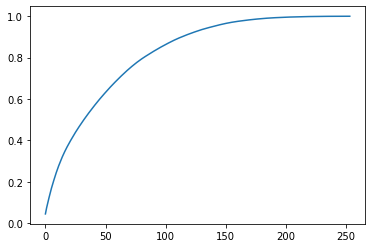

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(trainingData.reshape(-1, trainingData.shape[-1]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [16]:
np.concatenate([np.arange(trainingData.shape[-1]).reshape(-1,1), pca.explained_variance_ratio_.cumsum().reshape(-1,1)], -1)

array([[0.00000000e+00, 4.48699596e-02],
       [1.00000000e+00, 7.45629559e-02],
       [2.00000000e+00, 9.99946819e-02],
       [3.00000000e+00, 1.23453675e-01],
       [4.00000000e+00, 1.46759594e-01],
       [5.00000000e+00, 1.68610956e-01],
       [6.00000000e+00, 1.88574643e-01],
       [7.00000000e+00, 2.07630186e-01],
       [8.00000000e+00, 2.25949413e-01],
       [9.00000000e+00, 2.44155968e-01],
       [1.00000000e+01, 2.60797914e-01],
       [1.10000000e+01, 2.76855726e-01],
       [1.20000000e+01, 2.91687358e-01],
       [1.30000000e+01, 3.06135853e-01],
       [1.40000000e+01, 3.20065812e-01],
       [1.50000000e+01, 3.33332379e-01],
       [1.60000000e+01, 3.45323474e-01],
       [1.70000000e+01, 3.57095575e-01],
       [1.80000000e+01, 3.68436229e-01],
       [1.90000000e+01, 3.79181786e-01],
       [2.00000000e+01, 3.89720326e-01],
       [2.10000000e+01, 4.00093391e-01],
       [2.20000000e+01, 4.10127537e-01],
       [2.30000000e+01, 4.20088266e-01],
       [2.400000

In [17]:
n_componenents = 50
testPCA = pca.transform(testData.reshape(-1, testData.shape[-1]))
testReconstructed = pca.inverse_transform(testPCA)[...,:n_componenents].reshape(testData.size(0), testData.size(1), -1)

testReconstructed.shape


(250, 51, 50)

In [20]:
# nn.MSELoss(torch.tensor(testReconstructed), testData)

In [ ]:
# # prepare for training

# # file = open("Cori_MOs.pkl",'rb')
# file = open("Cori_Post.pkl",'rb')
# spk = pickle.load(file)

# NT=spk.shape[0]
# ntrials=spk.shape[1]
# NN=spk.shape[2]
# ncomp=10

# trainingData = torch.from_numpy(spk[:, :ntrials*4//5, :]).to(device).float()
# testData = torch.from_numpy(spk[:, ntrials*4//5:, :]).to(device).float()
